<a href="https://colab.research.google.com/github/9105507/APRENDIZAJE_AUTOMATICO_23_24/blob/main/AA_PRACTICA3_GRUPO_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Grupo 7**
Miguel Ángel Rojo

Miguel Poyatos García-Lorenzana

Jorge Barcenilla González

# DESCRIPCIÓN DEL PROBLEMA

En esta práctica se va a desarrollar una Red Neuronal Convolucional con el objetivo de obtener el mejor resultado posible en la precisión de los datos de test para la base de datos denominada CIFAR100.

CIFAR-100 es un conjunto de datos utilizado en el campo de la visión por computadora y el aprendizaje profundo. Es una versión más avanzada y compleja del conjunto de datos CIFAR-10. La sigla CIFAR significa "Canadian Institute for Advanced Research" (Instituto Canadiense de Investigación Avanzada). El conjunto de datos CIFAR-100 consta de 60,000 imágenes a color de 32x32 píxeles, pero a diferencia de CIFAR-10, cada imagen se clasifica en una de las 100 clases diferentes en lugar de solo 10. Estas 100 clases se dividen en 20 superclases, cada una de las cuales contiene 5 clases individuales. Aquí la lista de las diferentes clases con sus correspondientes superclases:

  | Clase                   | Superclase                       |
  |-------------------------|----------------------------------|
  | beaver                  | aquatic mammals                  |
  | dolphin                 | aquatic mammals                  |
  | otter                   | aquatic mammals                  |
  | seal                    | aquatic mammals                  |
  | whale                   | aquatic mammals                  |
  | aquarium fish           | fish                             |
  | flatfish                | fish                             |
  | ray                     | fish                             |
  | shark                   | fish                             |
  | trout                   | fish                             |
  | orchids                 | flowers                          |
  | poppies                 | flowers                          |
  | roses                   | flowers                          |
  | sunflowers              | flowers                          |
  | tulips                  | flowers                          |
  | bottles                 | food containers                  |
  | bowls                   | food containers                  |
  | cans                    | food containers                  |
  | cups                    | food containers                  |
  | plates                  | food containers                  |
  | apples                  | fruit and vegetables             |
  | mushrooms               | fruit and vegetables             |
  | oranges                 | fruit and vegetables             |
  | pears                   | fruit and vegetables             |
  | sweet peppers           | fruit and vegetables             |
  | clock                   | household electrical devices     |
  | computer keyboard       | household electrical devices     |
  | lamp                    | household electrical devices     |
  | telephone               | household electrical devices     |
  | television              | household electrical devices     |
  | bed                     | household furniture              |
  | chair                   | household furniture              |
  | couch                   | household furniture              |
  | table                   | household furniture              |
  | wardrobe                | household furniture              |
  | bee                     | insects                          |
  | beetle                  | insects                          |
  | butterfly               | insects                          |
  | caterpillar             | insects                          |
  | cockroach               | insects                          |
  | bear                    | large carnivores                 |
  | leopard                 | large carnivores                 |
  | lion                    | large carnivores                 |
  | tiger                   | large carnivores                 |
  | wolf                    | large carnivores                 |
  | bridge                  | large man-made outdoor things    |
  | castle                  | large man-made outdoor things    |
  | house                   | large man-made outdoor things    |
  | road                    | large man-made outdoor things    |
  | skyscraper              | large man-made outdoor things    |
  | cloud                   | large natural outdoor scenes     |
  | forest                  | large natural outdoor scenes     |
  | mountain                | large natural outdoor scenes     |
  | plain                   | large natural outdoor scenes     |
  | sea                     | large natural outdoor scenes     |
  | camel                   | large omnivores and herbivores   |
  | cattle                  | large omnivores and herbivores   |
  | chimpanzee              | large omnivores and herbivores   |
  | elephant                | large omnivores and herbivores   |
  | kangaroo                | large omnivores and herbivores   |
  | fox                     | medium-sized mammals              |
  | porcupine               | medium-sized mammals              |
  | possum                  | medium-sized mammals              |
  | raccoon                 | medium-sized mammals              |
  | skunk                   | medium-sized mammals              |
  | crab                    | non-insect invertebrates          |
  | lobster                 | non-insect invertebrates          |
  | snail                   | non-insect invertebrates          |
  | spider                  | non-insect invertebrates          |
  | worm                    | non-insect invertebrates          |
  | baby                    | people                           |
  | boy                     | people                           |
  | girl                    | people                           |
  | man                     | people                           |
  | woman                   | people                           |
  | crocodile               | reptiles                         |
  | dinosaur                | reptiles                         |
  | lizard                  | reptiles                         |
  | snake                   | reptiles                         |
  | turtle                  | reptiles                         |
  | hamster                 | small mammals                    |
  | mouse                   | small mammals                    |
  | rabbit                  | small mammals                    |
  | shrew                   | small mammals                    |
  | squirrel                | small mammals                    |
  | maple                   | trees                            |
  | oak                     | trees                            |
  | palm                    | trees                            |
  | pine                    | trees                            |
  | willow                  | trees                            |
  | bicycle                 | vehicles 1                       |
  | bus                     | vehicles 1                       |
  | motorcycle              | vehicles 1                       |
  | pickup truck            | vehicles 1                       |
  | train                   | vehicles 1                       |
  | lawn-mower              | vehicles 2                       |
  | rocket                  | vehicles 2                       |
  | streetcar               | vehicles 2                       |
  | tank                    | vehicles 2                       |
  | tractor                 | vehicles 2                       |

El objetivo es crear un modelo de redes neuronales convolucionales que reconozca y clasifique estas imágenes en sus clases correspondientes, maximizando la puntuación de test. Este modelo será definido, configurado, entrenado, evaluado y mejorado progresivamente a lo largo de esta práctica.

# Inicialización de datos
En primer lugar, se importan todas las librerías que son necesarias a lo largo de esta práctica:

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, Callback, EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import gc
gc.collect()#LIMPIA BASURA

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


0

También, se comprueba que se está utilizando una version de TensorFlow 2.0.0 o superior:

In [2]:
print(tf.__version__)

2.14.0


A continuación, se cargan los datos de entrenamiento y de test a partir del método 'keras.datasets.cifar100'. Estos datos son los que se van a estar utilizando a lo largo de toda esta práctica.

In [3]:
cifar100 = keras.datasets.cifar100
(X, y), (test_X, test_y) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


# FUNCIONES UTILIZADAS

**COMENTAR CADA UNA DE ESTAS FUNCIONES Y EXPLICAR PARA QUE SE USAN/HAN USADO!!!!**

In [4]:
def evaluar_rendimiento_validacion(train_loss, train_acc, val_loss, val_acc):
    # Configuración de la figura para las gráficas
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # Gráfica de pérdida
    axs[0].plot(range(1, len(train_loss) + 1), train_loss, label='Pérdida de entrenamiento')
    axs[0].plot(range(1, len(val_loss) + 1), val_loss, label='Pérdida de validación')
    axs[0].set_xlabel('Época')
    axs[0].set_ylabel('Pérdida')
    axs[0].legend()
    axs[0].set_title('Gráfica de Pérdida')

    # Gráfica de precisión
    axs[1].plot(range(1, len(train_acc) + 1), train_acc, label='Precisión de entrenamiento')
    axs[1].plot(range(1, len(val_acc) + 1), val_acc, label='Precisión de validación')
    axs[1].set_xlabel('Época')
    axs[1].set_ylabel('Precisión')
    axs[1].legend()
    axs[1].set_title('Gráfica de Precisión')

    plt.show()

In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if np.max(predicted_label) == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{}[{:1.0f}] {:2.0f}% \n({}[{:1.0f}])".format(class_names[predicted_label],
                                predicted_label,
                                100*np.max(predictions_array),
                                class_names[true_label],
                                true_label),
                                color=color)


In [6]:
def plot_value_array(i, predictions_array, true_label, num_classes=5):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)

    # Obtén los índices de las clases con las probabilidades más altas
    top_indices = np.argsort(predictions_array)[-num_classes:]
    top_values = predictions_array[top_indices]

    thisplot = plt.bar(range(num_classes), top_values, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    # Configura las etiquetas del eje x para que sean los índices de las clases
    plt.xticks(range(num_classes), top_indices)

    # Configura las etiquetas del eje y para que sean 0 y 1
    plt.yticks([0, 1])

    if predicted_label == true_label:
        thisplot[np.where(top_indices == predicted_label)[0][0]].set_color('green')
    else:
        thisplot[np.where(top_indices == predicted_label)[0][0]].set_color('red')

In [7]:
# Look at confusion matrix
# Note, this code is taken straight from the SKLEARN website, an nice way of
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=70)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

# Pre procesado de datos

## Visualización de los datos

Se comprueba que se han descargado las 60000 imágenes en cuestión:

In [8]:
print("TAMAÑO TRAIN_DATA:",X.shape)
print("TAMAÑO TEST_DATA:",test_X.shape)
print("TAMAÑO TRAIN_LABELS:",y.shape)
print("TAMAÑO TEST_LABELS:",test_y.shape)

TAMAÑO TRAIN_DATA: (50000, 32, 32, 3)
TAMAÑO TEST_DATA: (10000, 32, 32, 3)
TAMAÑO TRAIN_LABELS: (50000, 1)
TAMAÑO TEST_LABELS: (10000, 1)


Se presentan las listas 'super_class_names', 'class_names'. Se presentan estas listas para comprobar los datos que se han descargado de cifar100 con fines de visualización de datos.

In [9]:
super_class_names = ["aquatic mammals",
                     "fish",
                     "flowers",
                     "food containers",
                     "fruit and vegetables",
                     "household electrical devices",
                     "household furniture",
                     "insects", "large carnivores",
                     "large man-made outdoor things",
                     "large natural outdoor scenes",
                     "large omnivores and herbivores",
                     "medium-sized mammals",
                     "non-insect invertebrates",
                     "people",
                     "reptiles",
                     "small mammals",
                     "trees",
                     "vehicles 1",
                     "vehicles 2"]

class_names = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed',
               'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge',
               'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar',
               'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
               'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin',
               'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
               'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard',
               'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle',
               'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
               'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
               'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit',
               'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal',
               'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
               'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
               'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
               'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
               'willow_tree', 'wolf', 'woman', 'worm']

class_to_superclass = {
 4: 0, 30: 0, 55: 0, 72: 0, 95: 0,
 1: 1, 32: 1, 67: 1, 73: 1, 91: 1,
 54: 2, 62: 2, 70: 2, 82: 2, 92: 2,
 9: 3, 10: 3, 16: 3, 28: 3, 61: 3,
 0: 4, 51: 4, 53: 4, 57: 4, 83: 4,
 22: 5, 39: 5, 40: 5, 86: 5, 87: 5,
 5: 6, 20: 6, 25: 6, 84: 6, 94: 6,
 6: 7, 7: 7, 14: 7, 18: 7, 24: 7,
 3: 8, 42: 8, 43: 8, 88: 8, 97: 8,
 12: 9, 17: 9, 37: 9, 68: 9, 76: 9,
 23: 10, 33: 10, 49: 10, 60: 10, 71: 10,
 15: 11, 19: 11, 21: 11, 31: 11, 38: 11,
 34: 12, 63: 12, 64: 12, 66: 12, 75: 12,
 26: 13, 45: 13, 77: 13, 79: 13, 99: 13,
 2: 14, 11: 14, 35: 14, 46: 14, 98: 14,
 27: 15, 29: 15, 44: 15, 78: 15, 93: 15,
 36: 16, 50: 16, 65: 16, 74: 16, 80: 16,
 47: 17, 52: 17, 56: 17, 59: 17, 96: 17,
 8: 18, 13: 18, 48: 18, 58: 18, 90: 18,
 41: 19, 69: 19, 81: 19, 85: 19, 89: 19
}

Visualizamos los datos de entrenamiento:

Clase: cattle
La superclase de 'cattle' es 'large omnivores and herbivores'.
Imagen:


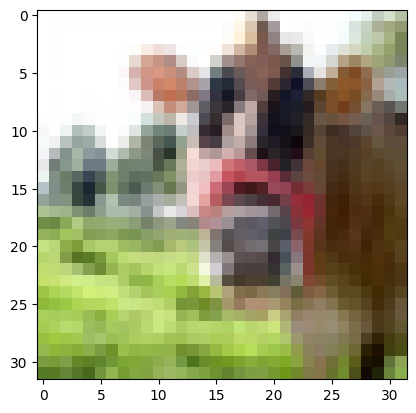

In [10]:
#PRIMERA IMAGEN:
imagen = X[0]
train_labels = y.reshape(50000)
print("Clase:",class_names[train_labels[0]])
superclass = super_class_names[class_to_superclass[train_labels[0]]]
print(f"La superclase de '{class_names[train_labels[0]]}' es '{superclass}'.")
print("Imagen:")
# Se muestra la imagen usando imshow()
plt.imshow(imagen)
plt.show()

Nótese que la etiqueta (cattle -> ganado) coincide con la imagen, confirmando la validez de los datos. Se prueba con un par más de imágenes:

Clase: mountain
La superclase de 'mountain' es 'large natural outdoor scenes'.
Imagen:


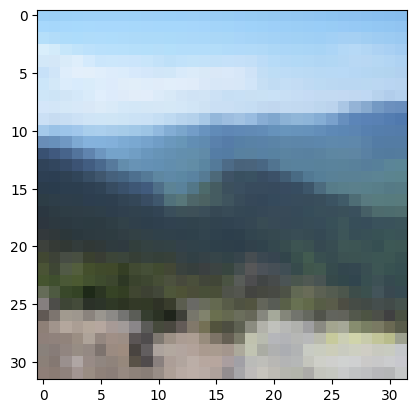

In [11]:
#IMAGEN nº 12345:
imagen = X[12345]
print("Clase:",class_names[train_labels[12345]])
superclass = super_class_names[class_to_superclass[train_labels[12345]]]
print(f"La superclase de '{class_names[train_labels[12345]]}' es '{superclass}'.")
print("Imagen:")
# Se muestra la imagen usando imshow()
plt.imshow(imagen)
plt.show()

Clase: shark
La superclase de 'shark' es 'fish'.
Imagen:


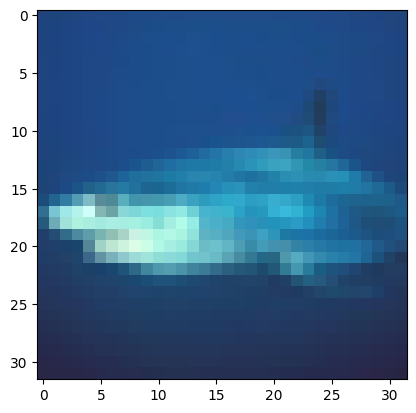

In [12]:
#ÚLTIMA IMAGEN:
imagen = X[49999]
print("Clase:",class_names[train_labels[49999]])
superclass = super_class_names[class_to_superclass[train_labels[49999]]]
print(f"La superclase de '{class_names[train_labels[49999]]}' es '{superclass}'.")
print("Imagen:")
# Se muestra la imagen usando imshow()
plt.imshow(imagen)
plt.show()

Se visualizan las distintas matrices rgb de la última imagen de los datos:

In [13]:
for i, color in enumerate(['ROJO', 'VERDE', 'AZUL']):
    # Se extrae la matriz del canal de color actual
    matriz_color = np.take(X[49999], i, axis=2)
    # Se configuran las opciones de impresión
    np.set_printoptions(threshold=np.inf,precision=2,suppress=True,linewidth=140)
    # Se imprimen la matriz junto con la etiqueta del color
    print(f"MATRIZ {color}:\n{np.matrix(matriz_color)}\n")

MATRIZ ROJO:
[[ 31  30  31  32  31  31  32  31  30  30  31  31  31  31  31  31  32  32  32  32  31  31  31  31  32  32  32  31  32  32  32  32]
 [ 29  28  30  31  31  31  32  31  30  28  27  28  28  27  27  27  28  28  28  28  28  28  28  29  30  31  31  30  32  32  32  31]
 [ 30  29  30  31  30  30  31  30  30  29  28  28  29  29  28  27  28  28  28  28  28  28  28  27  28  30  30  29  31  32  31  30]
 [ 31  30  30  30  30  30  30  29  29  28  29  29  29  30  29  28  29  29  29  29  29  29  29  28  27  30  30  30  31  31  30  29]
 [ 31  29  30  31  31  30  29  28  28  27  28  28  29  29  29  29  29  28  28  29  29  29  30  31  27  30  31  30  31  31  31  30]
 [ 31  29  30  31  31  30  30  29  28  28  28  28  29  29  29  29  29  28  28  28  29  29  29  29  30  29  29  30  31  31  31  30]
 [ 31  30  30  31  31  30  30  30  29  28  28  29  29  29  29  29  29  29  29  29  29  29  29  31  34  31  29  30  31  32  31  30]
 [ 31  30  30  31  31  30  30  30  29  28  28  29  29  29  29  29  28 

Visualizamos los datos de test:

Clase: mountain
La superclase de 'mountain' es 'large natural outdoor scenes'.
Imagen:


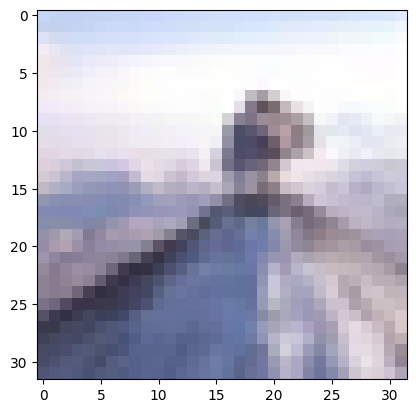

In [14]:
#PRIMERA IMAGEN:
imagen = test_X[0]
test_labels = test_y.reshape(10000)
print("Clase:",class_names[test_labels[0]])
superclass = super_class_names[class_to_superclass[test_labels[0]]]
print(f"La superclase de '{class_names[test_labels[0]]}' es '{superclass}'.")
print("Imagen:")
# Se muestra la imagen usando imshow()
plt.imshow(imagen)
plt.show()

Nótese que la etiqueta (mountain) coincide con la imagen, confirmando la validez de los datos. Se prueba con un par más de imágenes:

Clase: lamp
La superclase de 'lamp' es 'household electrical devices'.
Imagen:


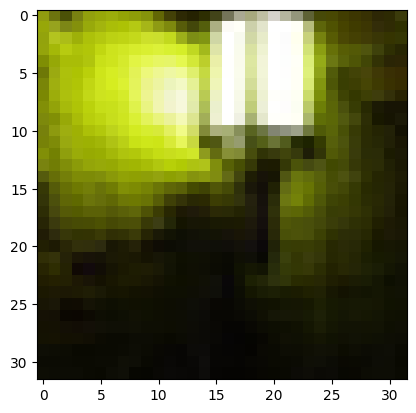

In [15]:
#IMAGEN nº 3984:
imagen = test_X[3984]
print("Clase:",class_names[test_labels[3984]])
superclass = super_class_names[class_to_superclass[test_labels[3984]]]
print(f"La superclase de '{class_names[test_labels[3984]]}' es '{superclass}'.")
print("Imagen:")
# Se muestra la imagen usando imshow()
plt.imshow(imagen)
plt.show()

Clase: rose
La superclase de 'rose' es 'flowers'.
Imagen:


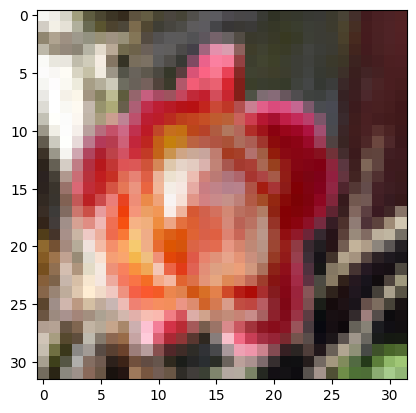

In [16]:
#ÚLTIMA IMAGEN:
imagen = test_X[9999]
print("Clase:",class_names[test_labels[9999]])
superclass = super_class_names[class_to_superclass[test_labels[9999]]]
print(f"La superclase de '{class_names[test_labels[9999]]}' es '{superclass}'.")
print("Imagen:")
# Se muestra la imagen usando imshow()
plt.imshow(imagen)
plt.show()

Para continuar, con el objetivo de conocer el balance de las clases de la base de datos, se ejecuta el siguiente código:

In [17]:
index_count = Counter(train_labels)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{class_names[index]}: {count}')

apple: 500
aquarium_fish: 500
baby: 500
bear: 500
beaver: 500
bed: 500
bee: 500
beetle: 500
bicycle: 500
bottle: 500
bowl: 500
boy: 500
bridge: 500
bus: 500
butterfly: 500
camel: 500
can: 500
castle: 500
caterpillar: 500
cattle: 500
chair: 500
chimpanzee: 500
clock: 500
cloud: 500
cockroach: 500
couch: 500
crab: 500
crocodile: 500
cup: 500
dinosaur: 500
dolphin: 500
elephant: 500
flatfish: 500
forest: 500
fox: 500
girl: 500
hamster: 500
house: 500
kangaroo: 500
keyboard: 500
lamp: 500
lawn_mower: 500
leopard: 500
lion: 500
lizard: 500
lobster: 500
man: 500
maple_tree: 500
motorcycle: 500
mountain: 500
mouse: 500
mushroom: 500
oak_tree: 500
orange: 500
orchid: 500
otter: 500
palm_tree: 500
pear: 500
pickup_truck: 500
pine_tree: 500
plain: 500
plate: 500
poppy: 500
porcupine: 500
possum: 500
rabbit: 500
raccoon: 500
ray: 500
road: 500
rocket: 500
rose: 500
sea: 500
seal: 500
shark: 500
shrew: 500
skunk: 500
skyscraper: 500
snail: 500
snake: 500
spider: 500
squirrel: 500
streetcar: 500
su

Se observa que la base de datos está perfectamente equilibrada, lo cual es una buena noticia para nosotros. Se realiza con las superclases también por terminar de validarlo.

In [18]:
y_super = []
for etiqueta in train_labels:
  y_super.append(class_to_superclass[etiqueta])

index_count = Counter(y_super)
sorted_indices = sorted(index_count.items())
for index, count in sorted_indices:
    print(f'{super_class_names[index]}: {count}')

aquatic mammals: 2500
fish: 2500
flowers: 2500
food containers: 2500
fruit and vegetables: 2500
household electrical devices: 2500
household furniture: 2500
insects: 2500
large carnivores: 2500
large man-made outdoor things: 2500
large natural outdoor scenes: 2500
large omnivores and herbivores: 2500
medium-sized mammals: 2500
non-insect invertebrates: 2500
people: 2500
reptiles: 2500
small mammals: 2500
trees: 2500
vehicles 1: 2500
vehicles 2: 2500


Por último visualizamos un gran conjunto de datos aleatorios:

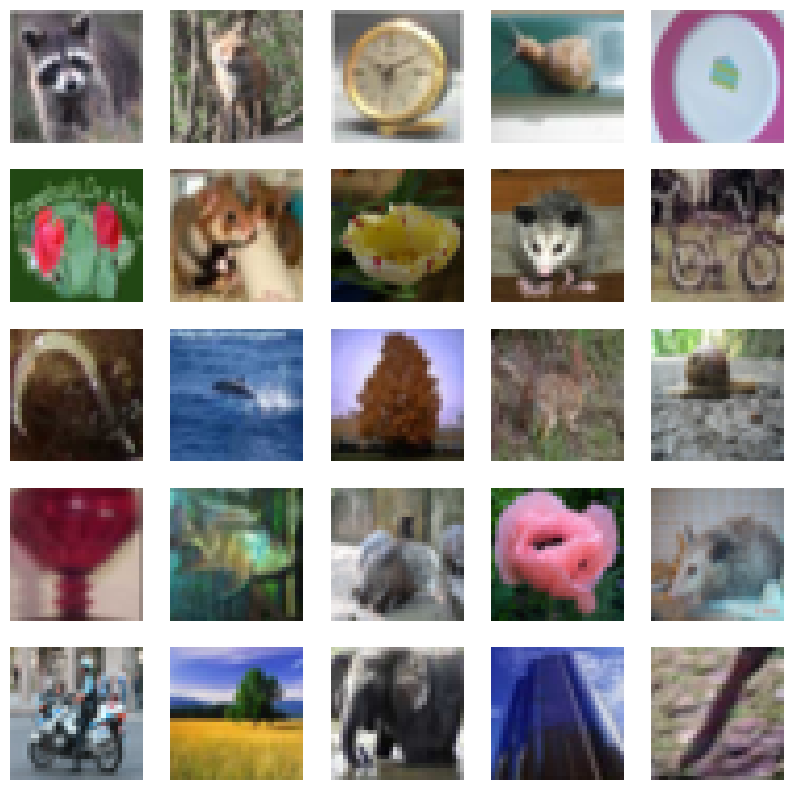

In [19]:
import numpy as np

fig, axes = plt.subplots(5, 5, figsize=(10,10))

# Rellenar el subplot con imágenes aleatorias
for i in range(5):
    for j in range(5):
        # Seleccionar un índice aleatorio
        idx = np.random.randint(len(X))
        # Mostrar la imagen correspondiente en el subplot
        axes[i, j].imshow(X[idx], cmap=plt.cm.binary)
        # Eliminar los ejes para una mejor visualización
        axes[i, j].axis('off')
plt.show()

## Normalización y One Hot Encoding

Para finalizar el pre-procesado de datos, se normalizan los datos, se tranforman las etiquetas a 'one-hot' encoding y se hace la partición de los datos en train-validation-test.

In [20]:
#X, test_X, y, test_y = train_test_split(np.concatenate((X, test_X)), np.concatenate((y, test_y)), test_size=1/6, random_state=23)

#Se normalizan los datos:
X = X.astype('float32')/255
test_X = test_X.astype('float32')/255

# Se convierten las etiquetas a codificación one-hot
y_categorical = to_categorical(y)
test_y_categorical = to_categorical(test_y)

# Se dividen los datos en train y validation:
train_X, val_X, train_y, val_y = train_test_split(X, y_categorical, test_size=0.2, random_state=89)
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 100)
(10000, 100)


## Ingeniería de características

En primer lugar, el aumento de datos, o data augmentation en inglés, es una técnica comúnmente utilizada en aprendizaje profundo para mejorar el rendimiento y la generalización de un modelo mediante la generación de nuevas muestras de entrenamiento a partir de las existentes. La idea fundamental es aplicar transformaciones aleatorias a las imágenes originales, creando así variaciones que no afectan la etiqueta, pero enriquecen la diversidad del conjunto de datos.

Con el objetivo de implementar esta técnica se utiliza la clase ImageDataGenerator que TensorFlow y Keras proporcionan. Esta clase aplica aumentos de datos a imágenes durante el entrenamiento (en tiempo real) de modelos de aprendizaje profundo.

Algunas de las transformaciones comunes incluyen rotación, cambio de ancho y alto, cambio horizontal y vertical, y zoom. Estos aumentos ayudan al modelo a generalizar mejor al exponerlo a diversas variaciones de las imágenes de entrada.

Más concretamente, lo que realiza esta implementación que se usa es, a partir de los datos de entrenamiento que se le proporcionen, aplicar pequeñas transformaciones en tiempo real como la presentada en la siguiente celda de código:

Imagen:


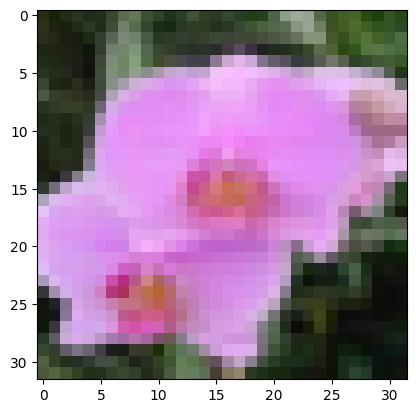

Aumento:


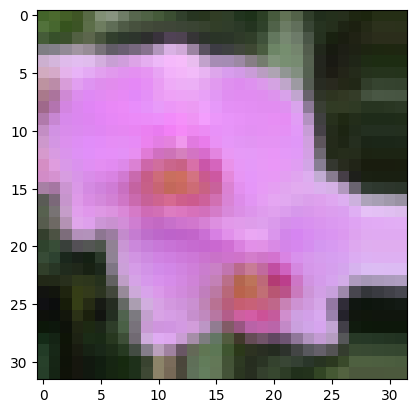

In [32]:
# Definir la cantidad de imágenes aumentadas que deseas generar por cada imagen original
num_augmentations = 1  # Puedes ajustar esto según tus necesidades

datagentrain = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

img = train_X[39999]
label = train_y[39999]
print("Imagen:")
# Se muestra la imagen usando imshow()
plt.imshow(img)
plt.show()
img = np.expand_dims(img, axis=0)
label = np.expand_dims(label, axis=0)

# Generar imágenes y etiquetas aumentadas
augmented_data = datagentrain.flow(img, label, shuffle=False)#batch_size=num_augmentations,
print("Aumento:")
# Se muestra la imagen usando imshow()
plt.imshow(augmented_data[0][0][0])
plt.show()
img = np.expand_dims(img, axis=0)
label = np.expand_dims(label, axis=0)

Más adelante se conretará más en cómo funciona esta implementación a la hora de entrenar al modelo, pero fundamentalmente, esto es lo que pasará en el entrenamiento de manera implícita.

PRUEBA: Resaltado de bordes de las imágenes.

SI NO DA TIEMPO, QUITARLO

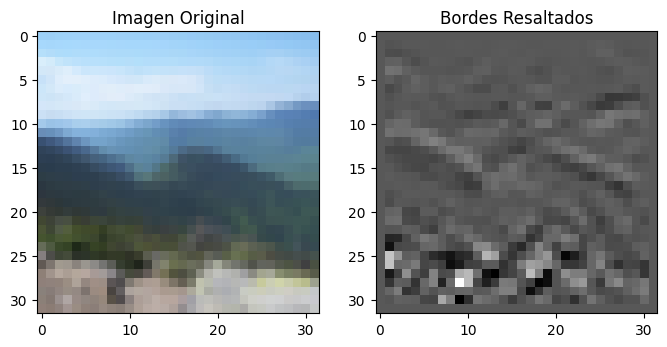

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tienes una imagen en formato RGB de 32x32 (img)
# Si tienes la imagen en otro formato o tamaño, ajústala según sea necesario.

# Aplicar filtro Sobel para detección de bordes
gray_img = cv2.cvtColor(X[12345], cv2.COLOR_RGB2GRAY)
edges = cv2.Sobel(gray_img, cv2.CV_64F, 1, 1, ksize=3)

# Normalizar los valores para visualización
edges = cv2.normalize(edges, None, 0, 255, cv2.NORM_MINMAX)

# Convertir de nuevo a formato RGB para visualización
edges_rgb = cv2.cvtColor(edges.astype(np.uint8), cv2.COLOR_GRAY2RGB)

# Mostrar la imagen original y la imagen con bordes resaltados
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X[12345])
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(edges_rgb)
plt.title('Bordes Resaltados')

plt.show()

Además, se ha probado a subir el brillo a la imagenes. Patra esto se ha aplicado tres filtros a todas las imagenes. Lo que hemos hecho ha sido aplicar 3 funciones a los tres colores para reducir su intesidad de forma cuadrática:

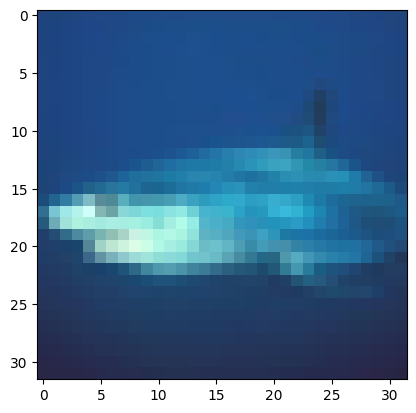

In [23]:
digit = X[49999]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

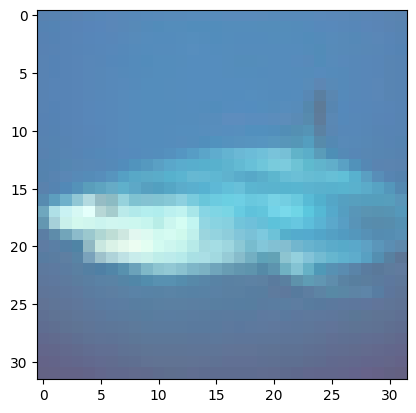

In [24]:
digit = X[49999].copy()
digit[:,:,0] = np.sqrt(digit[:,:,0]) # SQRT
digit[:,:,1] = np.sqrt(digit[:,:,1]) # SQRT
digit[:,:,2] = np.sqrt(digit[:,:,2]) # SQRT
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

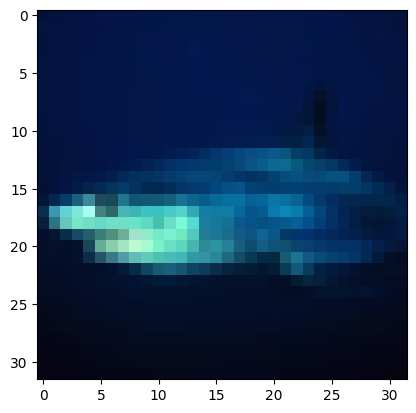

In [25]:
digit = X[49999].copy()
digit[:,:,0] = digit[:,:,0]**2
digit[:,:,1] = digit[:,:,1]**2
digit[:,:,2] = digit[:,:,2]**2
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [26]:
# X_oscuro = X.copy()
# X_oscuro[:,:,:,0] = X_oscuro[:,:,:,0]**2
# X_oscuro[:,:,:,1] = X_oscuro[:,:,:,1]**2
# X_oscuro[:,:,:,2] = X_oscuro[:,:,:,2]**2

# X_brillante = X.copy()
# X_brillante[:,:,:,0] = np.sqrt(X_brillante[:,:,:,0])
# X_brillante[:,:,:,1] = np.sqrt(X_brillante[:,:,:,1])
# X_brillante[:,:,:,2] = np.sqrt(X_brillante[:,:,:,2])

In [27]:
# import numpy as np

# fig, axes = plt.subplots(5, 5, figsize=(10,10))

# # Rellenar el subplot con imágenes aleatorias
# for i in range(5):
#     for j in range(5):
#         # Calcula el índice en la lista de índices aleatorios
#         indx = i * 5 + j
#         # Mostrar la imagen correspondiente en el subplot
#         axes[i, j].imshow(X_brillante[indx], cmap=plt.cm.binary)
#         # Eliminar los ejes para una mejor visualización
#         axes[i, j].axis('off')
# plt.show()

In [28]:
# import numpy as np

# fig, axes = plt.subplots(5, 5, figsize=(10,10))

# # Rellenar el subplot con imágenes aleatorias
# for i in range(5):
#     for j in range(5):
#         # Calcula el índice en la lista de índices aleatorios
#         indx = i * 5 + j
#         # Mostrar la imagen correspondiente en el subplot
#         axes[i, j].imshow(X_oscuro[indx], cmap=plt.cm.binary)
#         # Eliminar los ejes para una mejor visualización
#         axes[i, j].axis('off')
# plt.show()

Borrador: FALTA PROBAR EN MODELO

# DESARROLLO DEL MODELO

## METODOLOGÍA

La construcción de un modelo convolucional es un proceso que involucra diversas etapas y muchas consideraciones. Por lo tanto, para tener un orden, aquí se definen los pasos que se han seguido en el desarrollo de nuestro modelo:

1. **Diseño de un Modelo Simple como base. **

  Se comenzará con un modelo simple, y a partir de este se irá construyendo lo que será el modelo final.

2. **Diseño de la Arquitectura del Modelo**

  Se continuará el proceso definiendo una estructura mejor del modelo, tomando decisiones sobre la cantidad de capas convolucionales, capas de pooling, capas totalmente conectadas y otros componentes específicos de la arquitectura.

3. **Ajuste de Hiperparámetros**

  Una vez se tenga una arquitectura inicial, se comenzará a ajustar los hiperparámetros.

4. **Incorporación de Regularización**

  Después de establecer una configuración inicial, se considerará la incorporación de técnicas de regularización como dropout, regularización L1 o L2 (o ambas), entre otras.

5. **Prevención de Sobreajuste**

  Una vez aplicada la regularización, se observará cómo se comporta el modelo en términos de sobreajuste. Se ajustará la cantidad de dropout, la fuerza de la regularización, y se experimentará con técnicas como el aumento de datos para mejorar la capacidad de generalización del modelo.

6. **Ajuste Fino de Hiperparámetros**

  Se realizarán los últimos ajustes en los hiperparámetros para refinar el rendimiento del modelo, si fuese necesario.

7. **Evaluación Final** - Pruebas en Conjunto de Pruebas

## MODELO MÁS SIMPLE

Se comienza con un modelo sencillo de redes neuronales convolucionales, y a partir de este iremos construyendo nuestro modelo final. Para ello, utilizamos la misma arquitectura utilizada con la base de datos mnist de los dígitos del 0 al 9, la cuál era bastante simple. La arquitectura es la siguiente:

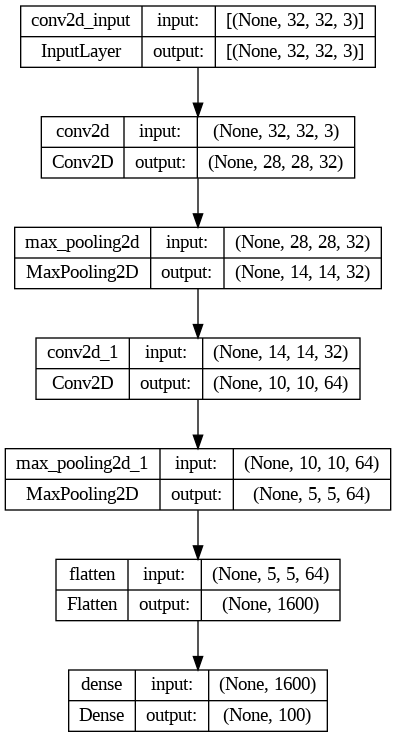

In [ ]:
gc.collect()#LIMPIA BASURA
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='softmax'))
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

Se puede observar que es un modelo simple, con solo 213796 parámetros entrenables.

Como el objetivo es optimizar la precisión de test, de manera orientativa, veamos qué puntuación obtenemos con el modelo básico con 10 épocas y batch_size = 128:

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X, y_categorical, batch_size=128, epochs=10, verbose=2)
test_loss, test_acc = model.evaluate(test_X, test_y_categorical, verbose = 0)

print('Test accuracy:', test_acc)

Epoch 1/10
391/391 - 12s - loss: 3.9022 - accuracy: 0.1149 - 12s/epoch - 30ms/step
Epoch 2/10
391/391 - 2s - loss: 3.2778 - accuracy: 0.2280 - 2s/epoch - 4ms/step
Epoch 3/10
391/391 - 2s - loss: 2.9574 - accuracy: 0.2893 - 2s/epoch - 5ms/step
Epoch 4/10
391/391 - 2s - loss: 2.7501 - accuracy: 0.3311 - 2s/epoch - 5ms/step
Epoch 5/10
391/391 - 2s - loss: 2.5791 - accuracy: 0.3648 - 2s/epoch - 5ms/step
Epoch 6/10
391/391 - 2s - loss: 2.4387 - accuracy: 0.3972 - 2s/epoch - 5ms/step
Epoch 7/10
391/391 - 2s - loss: 2.3094 - accuracy: 0.4215 - 2s/epoch - 5ms/step
Epoch 8/10
391/391 - 2s - loss: 2.2006 - accuracy: 0.4465 - 2s/epoch - 5ms/step
Epoch 9/10
391/391 - 3s - loss: 2.0998 - accuracy: 0.4718 - 3s/epoch - 7ms/step
Epoch 10/10
391/391 - 4s - loss: 2.0165 - accuracy: 0.4880 - 4s/epoch - 9ms/step
Test accuracy: 0.37299999594688416


Lo que se puede concluir de nuestro modelo simple es que, efectivamente tiene mucho margen de mejora, teniendo solo un (más o menos) 35% de precisión en el test (está claramente sobreentrenado). No obstante, cabe destacar que al menos, ya es mejor que el peor modelo posible, que sería elegir al azar un número del 1 al 100 y que esa fuese nuestra predicción, lo cuál tendría una probabilidad de acierto de 0.01.

## ARQUITECTURA DEL MODELO

AQUI DEFINES DISTINTAS ARQUITECTURAS QUE HAYAS UTILIZADO SIN CODIGO SOLO CON LAS GRAFICAS Y DICES QUE TAKL FUNCIONARON Y PORQUE ERAN PEORES

Compliquemos un poco la arquitectura de nuestro modelo. Se considera el siguiente diseño:

In [ ]:
gc.collect()#LIMPIA BASURA
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 128)        

Como se puede observar, se ha añadido una secuencia más de Capas Conv2d-MaxPooling, además de una capa Dense extra antes de la capa Dense con la función de activación 'softmax' (que es la que crea la distribución de probabilidad que devuelve nuestro modelo como predicción).

Nótese, que se ha cambiado el tamaño del kernel (filtro) en todas las convolucionales. Esto es, principalmente porque en la última capa daba error debido a un problema con las dimensiones, y en parte porque esto hace que haya muchos menos parámetros entrenables, lo cual favorece la disminución del sobreentrenamiento (menos parámetros --> menos obtención de patrones por la red).

Esto ha aumentado la complejidad (de 213796 parámetros entrenables a 407204). Veamos otra vez, de manera orientativa, si este enfoque mejora en algo la precisión de test con 10 épocas:

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X, y_categorical, batch_size=128, epochs=10, verbose=2)
test_loss, test_acc = model.evaluate(test_X, test_y_categorical, verbose = 0)

print('Test accuracy:', test_acc)

Epoch 1/10
391/391 - 3s - loss: 4.0387 - accuracy: 0.0849 - 3s/epoch - 9ms/step
Epoch 2/10
391/391 - 2s - loss: 3.4478 - accuracy: 0.1794 - 2s/epoch - 5ms/step
Epoch 3/10
391/391 - 2s - loss: 3.1052 - accuracy: 0.2408 - 2s/epoch - 5ms/step
Epoch 4/10
391/391 - 2s - loss: 2.8543 - accuracy: 0.2902 - 2s/epoch - 5ms/step
Epoch 5/10
391/391 - 2s - loss: 2.6544 - accuracy: 0.3325 - 2s/epoch - 5ms/step
Epoch 6/10
391/391 - 2s - loss: 2.4737 - accuracy: 0.3717 - 2s/epoch - 5ms/step
Epoch 7/10
391/391 - 2s - loss: 2.3184 - accuracy: 0.4050 - 2s/epoch - 5ms/step
Epoch 8/10
391/391 - 2s - loss: 2.1748 - accuracy: 0.4358 - 2s/epoch - 5ms/step
Epoch 9/10
391/391 - 2s - loss: 2.0282 - accuracy: 0.4667 - 2s/epoch - 5ms/step
Epoch 10/10
391/391 - 2s - loss: 1.8969 - accuracy: 0.4977 - 2s/epoch - 5ms/step
Test accuracy: 0.3691999912261963


Vemos que se sigue claramente sobreentrenando y que más o menos ha mejorado la precisión en un par de puntos, lo cual no es un cambio significativo. Veamos con los datos de validación, el sobreentrenamiento de este modelo:

Epoch 1/20
313/313 - 4s - loss: 4.1385 - accuracy: 0.0696 - val_loss: 3.9061 - val_accuracy: 0.1005 - 4s/epoch - 13ms/step
Epoch 2/20
313/313 - 2s - loss: 3.5590 - accuracy: 0.1607 - val_loss: 3.3550 - val_accuracy: 0.1945 - 2s/epoch - 6ms/step
Epoch 3/20
313/313 - 2s - loss: 3.2255 - accuracy: 0.2235 - val_loss: 3.1799 - val_accuracy: 0.2282 - 2s/epoch - 6ms/step
Epoch 4/20
313/313 - 2s - loss: 2.9799 - accuracy: 0.2697 - val_loss: 2.9667 - val_accuracy: 0.2663 - 2s/epoch - 6ms/step
Epoch 5/20
313/313 - 2s - loss: 2.7677 - accuracy: 0.3099 - val_loss: 3.0807 - val_accuracy: 0.2579 - 2s/epoch - 6ms/step
Epoch 6/20
313/313 - 2s - loss: 2.5892 - accuracy: 0.3466 - val_loss: 2.8115 - val_accuracy: 0.3052 - 2s/epoch - 6ms/step
Epoch 7/20
313/313 - 2s - loss: 2.4254 - accuracy: 0.3788 - val_loss: 2.7159 - val_accuracy: 0.3270 - 2s/epoch - 7ms/step
Epoch 8/20
313/313 - 2s - loss: 2.2685 - accuracy: 0.4132 - val_loss: 2.7439 - val_accuracy: 0.3306 - 2s/epoch - 6ms/step
Epoch 9/20
313/313 - 2s

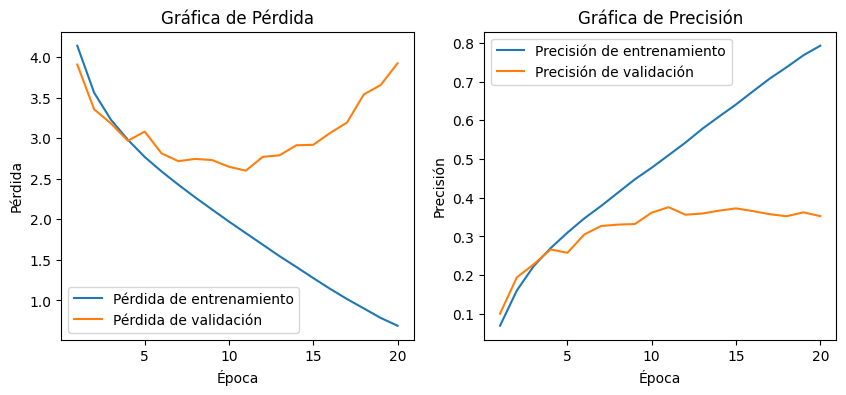

In [ ]:
gc.collect()#LIMPIA BASURA
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, batch_size=128, epochs=20, validation_data=(val_X, val_y), verbose=2)
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

Se observa claramente que este modelo está muy sobreentrenado y que no generaliza.

## AMPLIACIÓN

Aunque el modelo todavía no está terminado, se comienza a ajustar ciertos hiperparámetros. Para comenzar, después de investigar y probar con distintos tamaños de minilote, se decide que un 'batch_size' óptimo es 128 debido a que pensamos que es un punto medio entre un tamaño de minilote pequeño, el cual ofrece una convergencia más rápida pero un tiempo de cómputo más largo; y uno grande, que puede ofrecer más generalidad pero puede ocupar mucho más tamaño en la RAM. No obstante, también se ha visto que tamaños pequeños como 32 y 64 funcionan bien en este tipo de problemas, aunque requieran de más tiempo de computación.

También, como ya se ha mencionado anteriormente, se decide que el tamaño de los filtros en todas las capas convolucionales sea de 3x3 por temas de dimensionalidad y generalización (sobreentrenamiento).

Por otro lado, se decide modificar el hiperparámetro 'padding' y asignarlo a 'same', el cuál por defecto está asignado a 'valid'. El padding se refiere a la incorporación de píxeles alrededor de la entrada (en los bordes más concretamente) antes de aplicar la operación de convolución. Esta técnica es comúnmente utilizada para controlar el tamaño de la salida de la convolución y preservar la información en los bordes de la imagen, y esto es justo lo que se necesita, mantener el tamaño de las imágenes tras aplicarles las capas convoluciones ya que de esta manera se podrán diseñar arquitecturas más profundas (ya que la imágenes no pierden tanta dimensionalidad).

Hay dos tipos principales de "padding":


*   Sin Padding (o "valid" en Keras/TensorFlow): No agrega píxeles alrededor de la entrada. La salida de la convolución tiene un tamaño menor que la entrada, ya que el filtro no se aplica a los píxeles en los bordes.
*   Con Padding (o "same" en Keras/TensorFlow): Se agregan píxeles alrededor de la entrada para que la salida tenga el mismo tamaño que la entrada. Esto implica que el filtro se aplica a todos los píxeles de la entrada.

Por último, se cambia el 'stride' en las capas MaxPool (el stride es el paso con el que la ventana de pooling se mueve a través de la entrada recibida). Esto se realiza debido a que, al utilizar un paso más grande, la capa de pooling resalta características más prominentes lo que puede ayudar al modelo a aprender características más importantes.

Gracias a haber añadido padding = 'same', se presenta una nueva arquitectura, aún más compleja y profunda:

In [ ]:
gc.collect()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                 

Este modelo ya tiene 15305124 parámetros entrenables, 71'6 veces más que los que tenía el modelo básico inicial. Se ha añadido lo siguiente:

* **Profundidad de la red**: Este modelo tiene una mayor profundidad en comparación con el anterior. Tiene más capas convolucionales (6 en lugar de 3) y más capas densas (3 en lugar de 2). Esto permite que este modelo aprenda características más complejas y abstractas de las imágenes, lo que es beneficioso para la clasificación.

* **Número de mapas de características**: En este modelo se utilizan más mapas de características en cada capa convolucional en comparación con el primer modelo. Esto permite capturar una mayor variedad de características en cada capa y aumentar la capacidad del modelo para aprender representaciones más complejas.


Así, veamos el rendimiento del nuevo modelo, y su sobreentrenamiento, con los datos de validación en una gráfica:

Epoch 1/20
313/313 - 21s - loss: 4.4814 - accuracy: 0.0224 - val_loss: 4.3042 - val_accuracy: 0.0401 - 21s/epoch - 68ms/step
Epoch 2/20
313/313 - 16s - loss: 3.9131 - accuracy: 0.0929 - val_loss: 3.6147 - val_accuracy: 0.1389 - 16s/epoch - 50ms/step
Epoch 3/20
313/313 - 16s - loss: 3.4164 - accuracy: 0.1787 - val_loss: 3.2414 - val_accuracy: 0.1986 - 16s/epoch - 50ms/step
Epoch 4/20
313/313 - 17s - loss: 2.9945 - accuracy: 0.2566 - val_loss: 3.0483 - val_accuracy: 0.2556 - 17s/epoch - 55ms/step
Epoch 5/20
313/313 - 16s - loss: 2.6002 - accuracy: 0.3349 - val_loss: 2.6523 - val_accuracy: 0.3302 - 16s/epoch - 52ms/step
Epoch 6/20
313/313 - 16s - loss: 2.2074 - accuracy: 0.4171 - val_loss: 2.6603 - val_accuracy: 0.3438 - 16s/epoch - 52ms/step
Epoch 7/20
313/313 - 16s - loss: 1.7856 - accuracy: 0.5125 - val_loss: 2.5686 - val_accuracy: 0.3854 - 16s/epoch - 51ms/step
Epoch 8/20
313/313 - 16s - loss: 1.3088 - accuracy: 0.6262 - val_loss: 2.6636 - val_accuracy: 0.3950 - 16s/epoch - 51ms/step


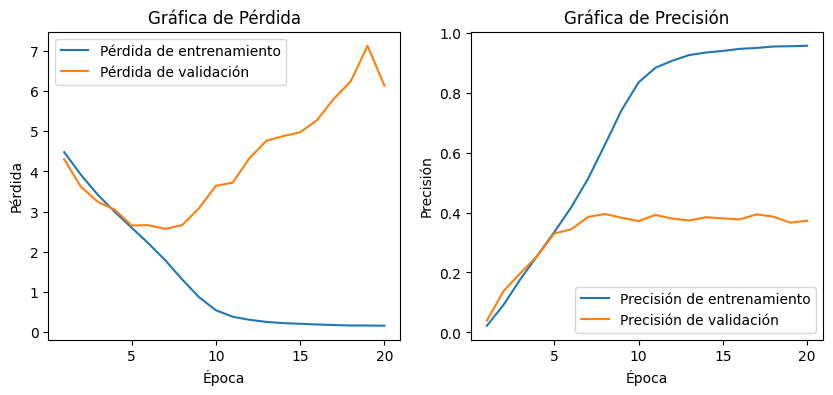

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, batch_size=128, epochs=20, validation_data=(val_X, val_y), verbose=2)
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

Como se puede observar en la gráfica, se ha creado un modelo que se sobreentrena mucho (muchísimo) a partir de la época 7 u 8. Por esto, se pasa a la regularización del modelo.

## REGULARIZACIÓN DEL MODELO

Una vez se ha desarrollado una estructura más compleja que la básica inicial, se procede a regularizar el modelo. Esto es, aplicar distintas técnicas que suavicen el sobreentrenamiento de nuestro modelo y que así, pueda generalizar mejor, lo que nos daría una mejor precisión de test. Las técnicas que se han investigado y que se van a probar son Dropout, Batch Normalization y regularizadores L1, L2 o L1 y L2.

### DROPOUT

El dropout es una técnica de regularización comúnmente utilizada en modelos de redes neuronales, diseñada para prevenir el sobreajuste o "overfitting". Consiste en desactivar aleatoriamente un conjunto proporcional de neuronas durante el entrenamiento, lo que impide que el modelo dependa demasiado de ciertas neuronas específicas y mejora su capacidad para generalizar a datos no vistos.

Durante cada iteración de entrenamiento, se seleccionan aleatoriamente algunas neuronas y se eliminan temporalmente, es decir, su salida se establece en cero. Esto simula el entrenamiento de múltiples modelos en paralelo, ya que diferentes conjuntos de neuronas se activan en diferentes instancias.

La tasa de dropout, que es un hiperparámetro, determina la probabilidad de que una neurona sea desactivada. Un valor común para la tasa de dropout es 0.5, lo que significa que, en promedio, la mitad de las neuronas se desactivarán en cada iteración.

En Keras es una layer más que se puede añadir de la siguiente manera:

'model.add(Dropout(tasa_dropout))'.

Esta capa se incorpora en nuestro modelo y se prueba más adelante.



### BATCH NORMALIZATION

Por otro lado, la normalización por lotes, o "batch normalization" en inglés, es una técnica utilizada en redes neuronales para mejorar la estabilidad y velocidad de convergencia del modelo durante el entrenamiento. Su objetivo principal es normalizar las entradas de cada capa en una red, mini lote por mini lote, ayudando a mitigar los problemas asociados con la variación en la distribución de los datos.

Durante el entrenamiento de una red neuronal, las activaciones de cada capa pueden cambiar drásticamente a medida que los pesos se ajustan. La normalización por lotes resuelve este problema normalizando las activaciones de cada capa, lo que implica restar la media del mini lote y dividir por la desviación estándar.

Este proceso asegura que las activaciones se mantengan centradas alrededor de cero y con varianza unitaria, lo que facilita el entrenamiento y permite el uso de tasas de aprendizaje más altas. Además, la normalización por lotes actúa como un regularizador, reduciendo la dependencia de las capas adyacentes y mejorando la capacidad de generalización del modelo.

En Keras es una layer más que se puede añadir de la siguiente manera:

'model.add(BatchNormalization())'.

Cabe destacar que las capas de normalización por lotes tienen parámetros no entrenables que son utilizados durante el entrenamiento de la red neuronal. Estos parámetros no entrenables son:

* Gamma (γ): Es un parámetro que escala la salida de la normalización. Básicamente, ajusta la magnitud de la normalización para cada canal. Si gamma es grande, significa que la normalización tendrá un efecto más pronunciado, y si es pequeño, tendrá un efecto más suave.

* Beta (β): Es un parámetro de sesgo que se añade después de la normalización. Ayuda a mantener la capacidad expresiva de la red al permitir desplazamientos lineales.

* Media Móvil (Moving Mean) y Desviación Estándar Móvil (Moving Variance): Estos parámetros mantienen un promedio móvil de la media y la desviación estándar del mini lote durante el entrenamiento. Ayudan a estabilizar la normalización durante el entrenamiento y a garantizar que el modelo generalice bien a diferentes datos.

Estos parámetros no entrenables permiten que la capa BatchNormalization ajuste dinámicamente la normalización para cada mini lote durante el entrenamiento. La utilización de gamma y beta proporciona flexibilidad al modelo para aprender la mejor escala y sesgo para la normalización, y la media móvil y la desviación estándar móvil aseguran una normalización consistente a lo largo del tiempo.

Esta nueva capa se incorpora en nuestro modelo y se prueba más adelante.

### REGULARIZADORES L1, L2 O L1 Y L2

Los regularizadores L1, L2 y L1_L2 son técnicas utilizadas en el entrenamiento de modelos de aprendizaje profundo para prevenir el sobreajuste y mejorar la generalización del modelo. Estos regularizadores se aplican a las funciones de pérdida durante el entrenamiento y afectan los pesos de la red de manera que se penaliza la complejidad del modelo.

1. L1 Regularización:

   * Definición: Introduce un término en la función de pérdida proporcional a la suma absoluta de los valores absolutos de los pesos.
   * Fórmula:
   \begin{equation}
R(W) = \lambda \sum_{i}|w_i|
\end{equation}
   * Efecto: Fomenta la dispersión de los pesos, llevando a que algunos pesos se vuelvan exactamente cero, lo que puede llevar a la selección de características y simplificación del modelo.

2. L2 Regularización:

   * Definición: Introduce un término en la función de pérdida proporcional a la suma de los cuadrados de los pesos.
   * Fórmula:
   \begin{equation}
R(W) = \lambda \sum_{i}w_i^2
\end{equation}
   * Efecto: Fomenta pesos más pequeños en magnitud y penaliza fuertemente los valores extremos. Ayuda a prevenir el sobreajuste y a mantener todos los pesos contribuyendo de manera más uniforme.

3. L1_L2 Regularización:

   * Definición: Combina los términos de regularización L1 y L2, añadiendo tanto la penalización de la suma absoluta como la penalización de la suma de cuadrados de los pesos.
   * Fórmula:
   \begin{equation}
R(W) = \lambda_1 \sum_{i}|w_i| + \lambda_2 \sum_{i}w_i^2
\end{equation}
   * Efecto: Combina los beneficios de L1 y L2, fomentando la dispersión de algunos pesos mientras mantiene otros pequeños en magnitud.
   
Estos regularizadores son controlados por un parámetro de regularización que determina la fuerza de la penalización. Ajustar este parámetro es crucial para equilibrar la necesidad de regularización con la capacidad del modelo para aprender patrones complejos en los datos. La elección entre L1, L2 o L1_L2 generalmente depende de la naturaleza del problema y de la preferencia empírica.

En este caso, se irá probando empíricamente comenzando con el regularizador L2.

### INTEGRACIÓN DE LOS REGULARIZADORES EN EL MODELO

Se considera la siguiente estructura:

In [42]:
gc.collect()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax', kernel_regularizer=l2(0.0001)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_40 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_41 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                      

Este modelo ya tiene 15312228 parámetros entrenables (los parámetros no entrenables son de las capas de normalización, lo cual se me mencionó anteriormente). Se ha añadido lo siguiente:

* **Capas BatchNormalization**: Se ha añadido una capa BatchNormalization después de cada una de las capas Conv2d o Dense para que las salidas se normalicen en cada uno de los pasos seguidos después de aplicar las transformaciones que se aplican en las capas mencionadas.

* **Capas Dropout**: Se han añadido capas Dropout en el tramo final del modelo después de cada una de las capas Dense con una tasa del 50% con el objetivo de que, después de la extracción de características realizada por las convolucionales, el modelo generalice más cuando proceso toda esta información en las capas Dense finales.

* **Regularizador L2**: Se han añadido regularizadores del tipo L2 en las capas Dense finales del modelo.


Así, veamos el rendimiento del nuevo modelo, y su sobreentrenamiento, con los datos de validación en una gráfica:

Epoch 1/20
313/313 - 23s - loss: 4.7141 - accuracy: 0.0851 - val_loss: 5.0921 - val_accuracy: 0.0461 - 23s/epoch - 72ms/step
Epoch 2/20
313/313 - 18s - loss: 3.6740 - accuracy: 0.2030 - val_loss: 3.4272 - val_accuracy: 0.2300 - 18s/epoch - 58ms/step
Epoch 3/20
313/313 - 19s - loss: 3.0818 - accuracy: 0.3115 - val_loss: 3.3144 - val_accuracy: 0.2635 - 19s/epoch - 62ms/step
Epoch 4/20
313/313 - 20s - loss: 2.7161 - accuracy: 0.3846 - val_loss: 2.6518 - val_accuracy: 0.3906 - 20s/epoch - 63ms/step
Epoch 5/20
313/313 - 18s - loss: 2.4017 - accuracy: 0.4542 - val_loss: 2.5927 - val_accuracy: 0.4122 - 18s/epoch - 58ms/step
Epoch 6/20
313/313 - 19s - loss: 2.1228 - accuracy: 0.5261 - val_loss: 2.8418 - val_accuracy: 0.4080 - 19s/epoch - 62ms/step
Epoch 7/20
313/313 - 18s - loss: 1.8444 - accuracy: 0.6069 - val_loss: 2.4299 - val_accuracy: 0.4939 - 18s/epoch - 58ms/step
Epoch 8/20
313/313 - 19s - loss: 1.5728 - accuracy: 0.6907 - val_loss: 2.8233 - val_accuracy: 0.4585 - 19s/epoch - 62ms/step


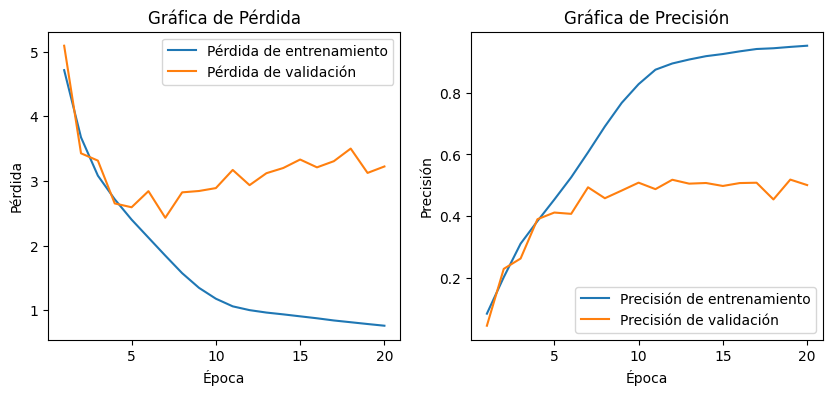

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(train_X, train_y, batch_size=128, epochs=20,
                    validation_data =(val_X, val_y),
                    verbose=2)
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

El sobreajuste es claramente visible, no obstante cabe destacar como el modelo ha mejorado la precisión en los datos de validación en un 12%, lo cual es una buena noticia debido a que significa que la precisión de test rondará esa cifra. Por esto, se comprueba la precisión de test con 20 épocas de entrenamiento:

In [45]:
test_loss, test_acc = model.evaluate(test_X, test_y_categorical, verbose = 0)
print('\n\nTest accuracy:', test_acc)



Test accuracy: 0.5153999924659729


Y así se verifica la notable mejora de nuestro modelo. No obstante, el sobreajuste sigue siendo exagerado, por lo que se procede a la implementación de data augmentation.

## INTRODUCCIÓN DE DATA AUGMENTATION EN EL MODELO

En el apartado de ingeniería de características se visualizó el aumento de datos que se va a implementar en nuestro modelo. Se realiza esta técnica debido a que, aunque se haya mejorado el modelo con lo desarrollado hasta el momento, y se haya reducido el sobreajuste, este sigue siendo muy pronunciado.

Con la clase que se va a utilizar, 'ImageDataGenerator', y mediante el método '.flow()', a la hora de entrenar en lugar de introducirle unos datos de entrenamiento se le va a proporcionar un generador de imágenes a nuestro modelo.

Así, nuestro modelo se va a seguir entrenando con el mismo número de imágenes que antes, con la diferencia que cada vez que se le vaya a proporcionar una imagen del set de train a nuestro modelo, se le va a realizar una transformación aleatoria como se explica anteriormete en ingeniería de características.

Se podría decir que esta implementación sería parecido a añadir una capa anterior a la primera capa convolucional, la cual transformase las imágenes como lo hace esta implementación en cuestión cada vez que se le introdujese una durante el entrenamiento.

De esta manera, se le brinda mucha más diversidad a las imágenes de entrenamiento, lo que debería conseguir que el modelo generalice considerablemente más, reduciendo así el sobreentrenamiento.

### EARLYSTOPPING

También, se incorpora una técnica que se denomina Early Stopping. Esta es una técnica utilizada en el entrenamiento de modelos de aprendizaje automático para evitar el sobreajuste (overfitting) y mejorar la eficiencia del proceso de entrenamiento. Es una forma de regularización que detiene el entrenamiento del modelo antes de que el rendimiento en un conjunto de validación deje de mejorar.

La idea principal detrás de EarlyStopping es monitorear una métrica específica, como la pérdida en un conjunto de validación, y detener el entrenamiento cuando esa métrica deja de mejorar durante un cierto número de épocas consecutivas (patience). Esto ayuda a evitar que el modelo se ajuste demasiado a los datos de entrenamiento y mejora su capacidad para generalizar a datos no vistos.

### CALLBACKS: REDUCELRONPLATEAU

Por último, también se considera la siguiente técnica de regularización. ReduceLROnPlateau es un callback que monitorea una métrica específica durante el entrenamiento, generalmente la pérdida en el conjunto de validación, y reduce la tasa de aprendizaje cuando esa métrica deja de mejorar. Este callback es útil para mejorar la convergencia del modelo, especialmente cuando la optimización se estanca o se está acercando a un mínimo local.

El parámetro factor especifica cuánto se reducirá la tasa de aprendizaje, y patience determina cuántas épocas el callback esperará antes de reducir la tasa de aprendizaje después de que se detenga la mejora en la métrica monitoreada. En el ejemplo proporcionado, si la métrica de validación (en este caso, 'val_loss') no mejora después de un número específico de épocas (definido por patience), la tasa de aprendizaje se reducirá multiplicándola por el factor dado (factor).

Esta técnica es útil para evitar que el modelo se quede atascado en mínimos locales o para permitir que la tasa de aprendizaje se adapte a las características cambiantes del espacio de pérdida durante el entrenamiento. Después de distintas pruebas, se ha observado que la técnica de data augmentation ralentiza mucho el proceso de entrenamiento (suaviza mucho la curva de aprendizaje), por esto, se añade esta técnica con el objetivo de acelerarlo cuando este se vea estancado en algún punto.

### PRUEBA CON DATOS DE VALIDACIÓN

Se comprueba si estas técnicas funcionan utilizando el modelo anterior con los datos de validación:

Epoch 1/100
313/313 - 34s - loss: 4.9073 - accuracy: 0.0594 - val_loss: 5.4467 - val_accuracy: 0.0185 - lr: 0.0010 - 34s/epoch - 108ms/step
Epoch 2/100
313/313 - 29s - loss: 4.1782 - accuracy: 0.1239 - val_loss: 3.7994 - val_accuracy: 0.1586 - lr: 0.0010 - 29s/epoch - 94ms/step
Epoch 3/100
313/313 - 36s - loss: 3.8167 - accuracy: 0.1789 - val_loss: 3.5931 - val_accuracy: 0.2035 - lr: 0.0010 - 36s/epoch - 116ms/step
Epoch 4/100
313/313 - 48s - loss: 3.4954 - accuracy: 0.2253 - val_loss: 3.4626 - val_accuracy: 0.2409 - lr: 0.0010 - 48s/epoch - 153ms/step
Epoch 5/100
313/313 - 29s - loss: 3.2690 - accuracy: 0.2726 - val_loss: 3.0954 - val_accuracy: 0.2934 - lr: 0.0010 - 29s/epoch - 93ms/step
Epoch 6/100
313/313 - 29s - loss: 3.0859 - accuracy: 0.3096 - val_loss: 2.7674 - val_accuracy: 0.3677 - lr: 0.0010 - 29s/epoch - 94ms/step
Epoch 7/100
313/313 - 29s - loss: 2.9302 - accuracy: 0.3489 - val_loss: 2.8096 - val_accuracy: 0.3845 - lr: 0.0010 - 29s/epoch - 91ms/step
Epoch 8/100
313/313 - 30

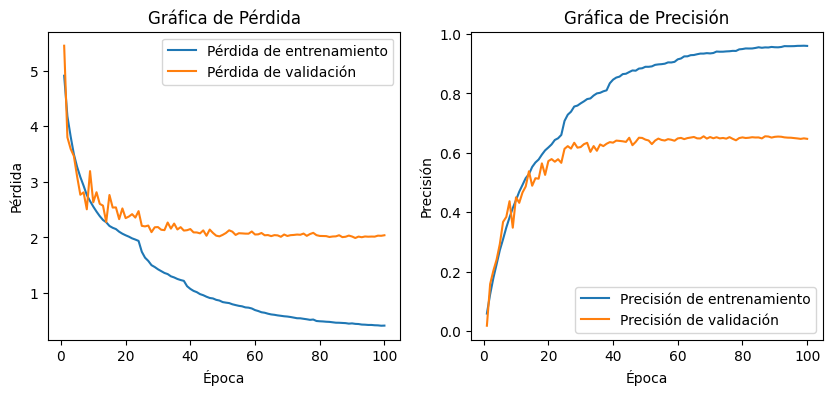

In [49]:
gc.collect()
datagentrain = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
train_generator = datagentrain.flow(train_X, train_y, batch_size = 128)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min',factor=0.5, patience=10, verbose=1)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax', kernel_regularizer=l2(0.0001)))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(train_generator,
                              epochs=100,#más épocas, data augmentation ralentiza mucho el proceso.
                              validation_data =(val_X, val_y),
                              callbacks=[early_stop, reduce_lr],
                              verbose=2)
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
print('\n RENDIMIENTO ENTRENAMIENTO:')
evaluar_rendimiento_validacion(train_loss,train_acc, val_loss, val_acc)

Aunque esté claramente sobreentrenado y la época óptima no se haya ajustado, veamos la puntuación en los datos de test con 100 épocas:

In [50]:
test_loss, test_acc = model.evaluate(test_X, test_y_categorical, verbose = 0)
print('\n\nTest accuracy:', test_acc)



Test accuracy: 0.6420000195503235


In [52]:
print("Máximo de acc en validación:", max(val_acc),", en la época:", val_acc.index(max(val_acc)))

Máximo de acc en validación: 0.6557999849319458 , en la época: 67


In [51]:
# Guardar el modelo completo en un archivo HDF5
model.save('mi_modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CALLBACK PARA GUARDAR MEJOR MODELO EN FUNCION DE LA VALIDACION:

In [ ]:
# from keras.callbacks import ModelCheckpoint

# # Crear un callback para guardar el mejor modelo
# checkpoint = ModelCheckpoint('mejor_modelo.h5', save_best_only=True)

# # Entrenar el modelo con el callback
# modelo.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[checkpoint])

## MODELO FINAL

METER MODELO FINAL Y GUARDARLO PARA QUE CUANDO HAYA QUE COMENTARLO

In [ ]:
gc.collect()#LIMPIA BASURA

model = Sequential()

model.add(Conv2D(128, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=1000, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1000, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=100, activation="softmax")) # Consideramos 100 clases

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       2

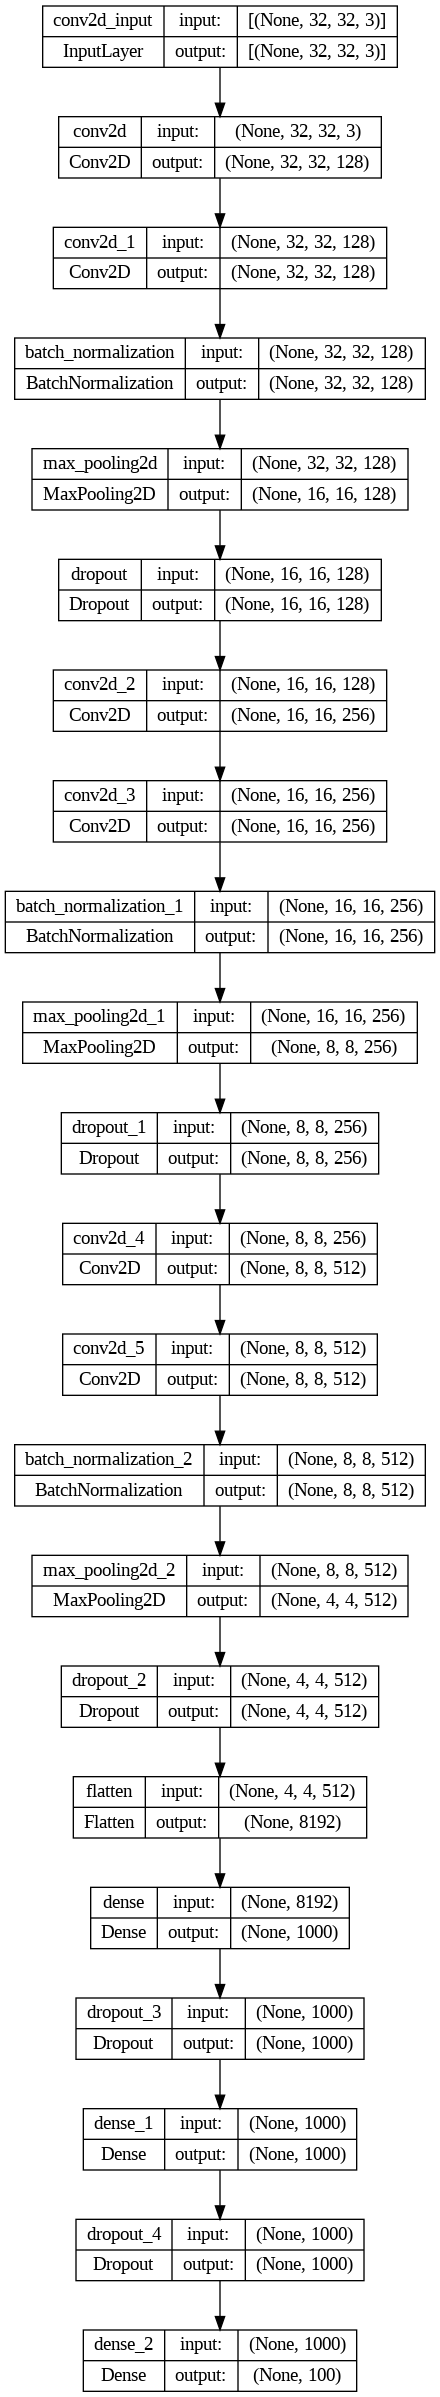

In [ ]:
model.summary()
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [ ]:
epochs = 300
batch_size = 64

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#early stopping para monitorear la pérdida de validación y evitar sobreentrenamiento
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
# la técnica de parada temprana en el entrenamiento del modelo. La parada temprana
# monitorea la pérdida de validación y detiene el entrenamiento si no se observan
# mejoras después de un número determinado de épocas. Esto evita el sobreajuste al
# detener el entrenamiento antes de que la pérdida de validación comience a aumentar.
# Aquí se usan los siguientes parámetros:
# monitor='val_loss': Se especifica que se va a monitorear la pérdida de validación.
# mode='min': Se especifica que se busca minimizar la pérdida de validación.
# verbose=1: Muestra mensajes informativos durante el entrenamiento, como el aviso de que se ha detenido el entrenamiento debido a la parada temprana.
# patience=20: Especifica el número de épocas que se deben esperar sin mejoras en
#              la pérdida de validación antes de detener el entrenamiento.

# salvamos el mejor modelo para luego compararlo, y así poder ahorrar ram y tiempo
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

#image augmentation para expandir los datos de test
#validation split to test the model
data_gen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            featurewise_center=True,
            width_shift_range=0.1,
            validation_split=0.2)

# history = model.fit(train_X, train_y,
#                               batch_size=128
#                               epochs=100,
#                               validation_data =(val_X, val_y),
#                               verbose=2)

data_gen.fit(train_X, seed=123)
# La línea de código data_gen.fit(X, seed=123) se usa para ajustar (fit) un
# generador de datos (data generator) a los datos de entrenamiento X.

# Un generador de datos es una forma eficiente de generar lotes de datos de
# entrenamiento en tiempo real durante el entrenamiento de un modelo de
# aprendizaje automático. Este generador puede aplicar transformaciones o
# aumentos de datos a medida que se generan los lotes, lo que ayuda a
# diversificar y aumentar el conjunto de datos de entrenamiento.

# En este caso, data_gen es el generador de datos y X es el conjunto de
# datos de entrenamiento. El método fit() se utiliza para ajustar el generador
# de datos a los datos de entrenamiento. El parámetro seed=123 se utiliza para
# establecer una semilla para garantizar la reproducibilidad de los resultados.

train_data_gen = data_gen.flow(train_X, train_y,
                               batch_size=64,
                               subset="training", seed=123)
# El método flow() del generador de datos data_gen se utiliza para generar lotes
# de datos a medida que se necesitan durante el entrenamiento. En este caso, se
# proporcionan los datos X y y como entrada al generador de datos.

# Los parámetros batch_size=64 especifican el tamaño de cada lote de datos que se
# generará. El parámetro subset="training" indica que se debe generar un
# subconjunto de datos de entrenamiento. Y el parámetro seed=123 se utiliza para
# establecer una semilla y garantizar la reproducibilidad de los resultados.

# Al asignar el resultado a train_data_gen, se crea un generador de datos de
# entrenamiento que se puede utilizar para alimentar los lotes de datos a un
# modelo durante el entrenamiento. Esto permite un entrenamiento más eficiente y
# escalable, especialmente cuando se trabaja con conjuntos de datos grandes.

valid_data_gen = data_gen.flow(val_X, val_y,
                               batch_size=64,
                               subset="validation", seed=123)

model_history = model.fit(train_data_gen,
                          #steps_per_epoch=40000//64,
                          validation_data=valid_data_gen,
                          #validation_steps=10000//64,
                          callbacks=[early_stop, model_checkpoint],
                          verbose=1,
                          epochs=epochs)

# Aquí se utiliza el método fit_generator() en lugar de fit() porque estamos
# utilizando un generador de datos en lugar de proporcionar directamente los datos
# de entrenamiento. Esto permite generar lotes de datos de manera eficiente
# durante el entrenamiento.

# Los parámetros utilizados son:

# train_data_gen: el generador de datos de entrenamiento que se utiliza para
#   proporcionar los lotes de datos al modelo durante el entrenamiento.
# steps_per_epoch: el número de pasos (batches) que se toman en cada época (epoch)
#   de entrenamiento. En este caso, se calcula dividiendo el tamaño total del
#   conjunto de entrenamiento (40000) por el tamaño de lote (batch_size).
# validation_data: el generador de datos de validación que se utiliza para evaluar
#   el rendimiento del modelo en el conjunto de validación durante el entrenamiento.
# validation_steps: el número de pasos (batches) que se toman en cada época (epoch)
#   de validación. En este caso, se calcula dividiendo el tamaño total del conjunto
#   de validación (10000) por el tamaño de lote (batch_size).
# callbacks: una lista de objetos de callback que se aplican durante el entrenamiento.
#   En este caso, se incluyen los callbacks early_stop y model_checkpoint.
#   El callback early_stop se utiliza para detener el entrenamiento temprano si no
#   se observa una mejora en la métrica de validación (en este caso, la pérdida)
#   durante un número determinado de épocas (patience). El callback model_checkpoint
#   se utiliza para guardar el modelo con la mejor métrica de validación durante
#   el entrenamiento.
# verbose: indica el nivel de detalle de la salida durante el entrenamiento.
#   En este caso, se establece en 1 para mostrar información detallada sobre el
#   progreso del entrenamiento.
# epochs: el número total de épocas de entrenamiento que se realizarán.

# El resultado del entrenamiento se guarda en la variable model_history, que puede
# utilizarse posteriormente para analizar y visualizar el rendimiento del modelo
# durante el entrenamiento.


Epoch 1/300
500/500 [==============================] - ETA: 0s - loss: 4.8223 - accuracy: 0.0113
Epoch 1: val_loss improved from inf to 7.16728, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - 2832s 6s/step - loss: 4.8223 - accuracy: 0.0113 - val_loss: 7.1673 - val_accuracy: 0.0165
Epoch 2/300
136/500 [=======>......................] - ETA: 33:38 - loss: 4.5772 - accuracy: 0.0173

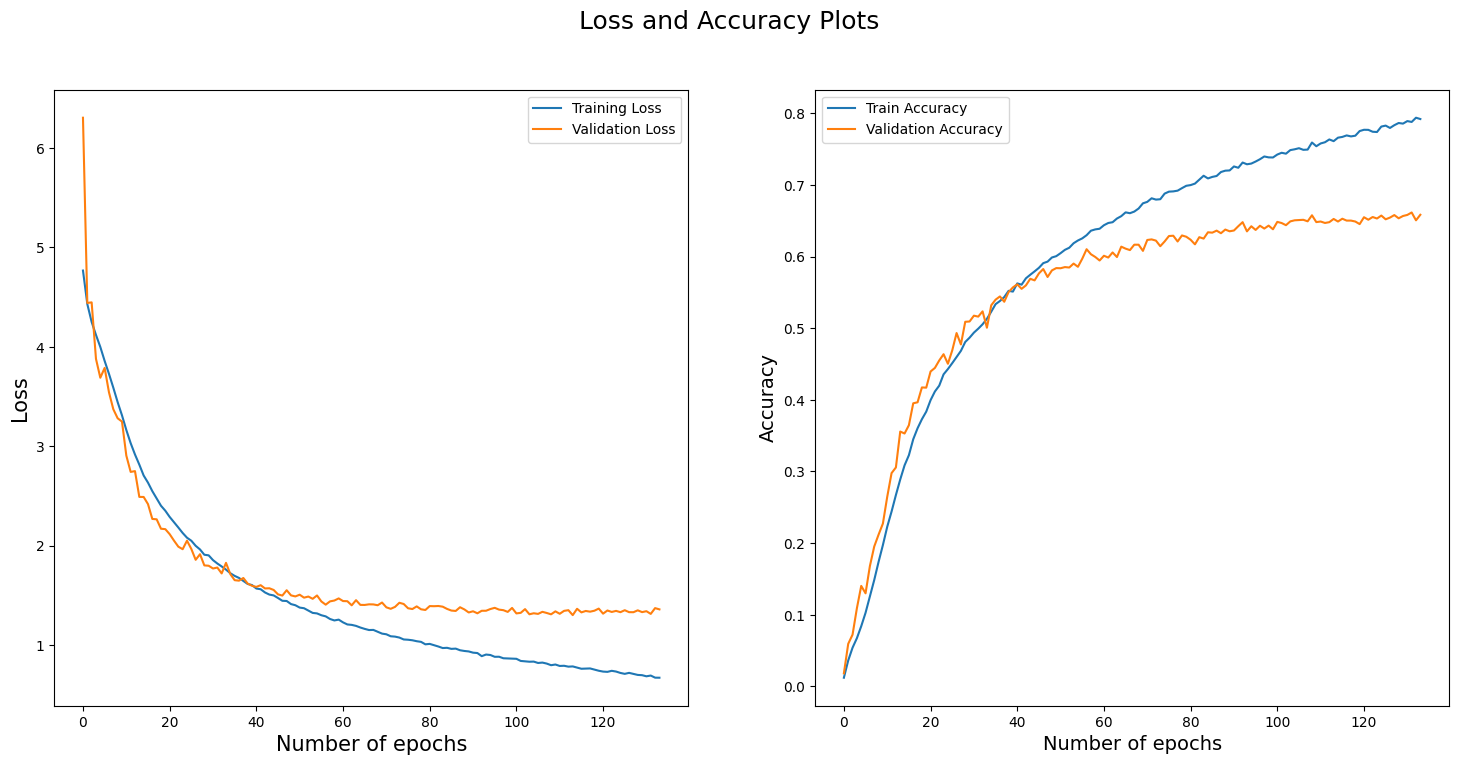

In [ ]:
# VISUALIZACION DE LOSS Y ACCURACCY EN TRAIN Y VAL DATA

plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
# ## Model Evaluation

#train_loss, train_accuracy = model.evaluate_generator(generator=train_data_gen, steps=40000//batch_size)
# valid_loss, valid_accuracy = model.evaluate(valid_data_gen, steps=10000//batch_size)
# test_loss, test_accuracy = model.evaluate(data_gen.flow(test_X, test_y, seed=123), steps=len(test_X)//batch_size)
# ESTO DE AQUÍ ARRIBA ESTÁ FATAL, HAY QUE EVALUAR CON LOS DATOS DE TEST NORMALES, NO CON LOS GENERADORES.

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")
print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")
print(" ")
print('Validation Loss: ', round(valid_loss, 2))
print('Test Loss: ', round(test_loss, 2))

NameError: ignored

JORGEEEE, DE MIKE, METE BATCH NORMALIZATION A TU MODELO FINAL DETRÁS DE CADA CONVOLUCIONAL PORFI.

DONE VEREMOS COMO SE EJECUTA

ES IMPORTANTE QUE DEJES LAS GRAFICAS

EXPORTAR LOS DATOS DEL HISTORY

## POSIBLES MEJORAS A FUTURO

JORGE TIENES QUE EXPLICAR TODO LO QUE HAS INVESTIGADO PERO NO HEMOS PODIDO HACER

1. Aumento del tamaño de las imagenes
2. talos
3. SAM
4. Ingenieria de caracteristicas
5. efficiency nets

# EVALUACIÓN DEL MODELO

## PREDICCIONES

Evaluamos el modelo elegido.

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_y_categorical, verbose = 1)
print('\n\nTest accuracy:', test_acc)



Test accuracy: 0.5098999738693237


Hacemos la predicción y mostramos cuantas imagenes se han evaluado correctamente:

In [ ]:
# Supongamos que 'predictions' son las etiquetas predichas por tu modelo
predictions = model.predict(test_X)

# Convertir las predicciones a etiquetas enteras
predicted_labels = np.argmax(predictions, axis=1)

# Contar cuántas predicciones son correctas
correct_predictions = np.sum(predicted_labels == np.argmax(test_y_categorical, axis=1))

print(f'Número de predicciones correctas: {correct_predictions}')
print(f'Número de predicciones totales: {len(predictions)}')

313/313 [==============================] - 2s 6ms/step
Número de predicciones correctas: 5099
Número de predicciones totales: 10000


Para entender que esta pasando con las etiquetas se explica paso a paso:

In [ ]:
print("=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================")
print(test_y)
print("=======================================================================")
# test_y = to_categorical(test_y)
print("\n=VEMOS UNA ETIQUETA DE TEST AL PASARLAS POR to_categorical============")
print(test_y_categorical[0])
print("=======================================================================")


print("\n\n=VEMOS LA ETIQUETA DEL ELEMENTO 0 =====================================")
print(test_y[0])
print("=======================================================================")
print("\n=VEMOS LA PREDICCIÓN DEL ELEMENTO 0 (QUE DEBERÍA SER UN 49)============")
print(predicted_labels[0])
print("=======================================================================")
print("\n=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 0 DEBERÍA SER 1====")
print(np.sum(predictions[0]))
print("=======================================================================")

=VEMOS LAS ETIQUETAS DE TEST ORIGINALES================================
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]

=VEMOS UNA ETIQUETA DE TEST AL PASARLAS POR to_categorical============
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


=VEMOS LA ETIQUETA DEL ELEMENTO 0 =====================================
[49]

=VEMOS LA PREDICCIÓN DEL ELEMENTO 0 (QUE DEBERÍA SER UN 49)============
90

=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 0 DEBERÍA SER 1====
1.0


Ahora vamos a ver cuales han sido las predicciones de las primeras 20 imagenes. Se muestra cual ha sido la etiqueta que el modelo ha predecido como correcta y en la gráfica de la derecha vemos cuáles son las 5 clases que el modelo considera que la imagen tiene más probabilidad de ser.

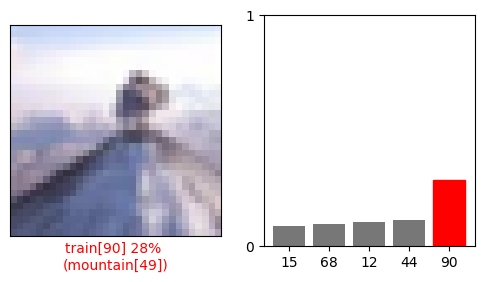

<Figure size 640x480 with 0 Axes>

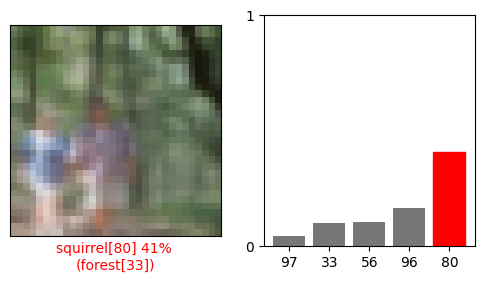

<Figure size 640x480 with 0 Axes>

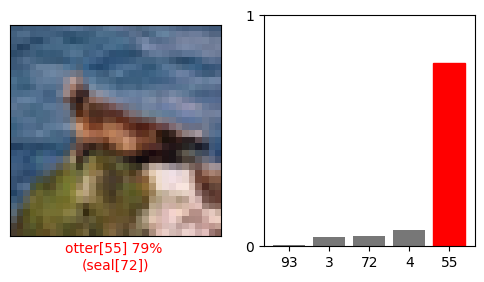

<Figure size 640x480 with 0 Axes>

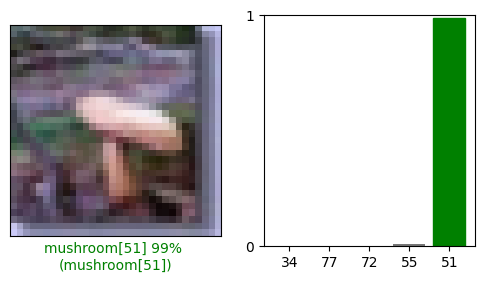

<Figure size 640x480 with 0 Axes>

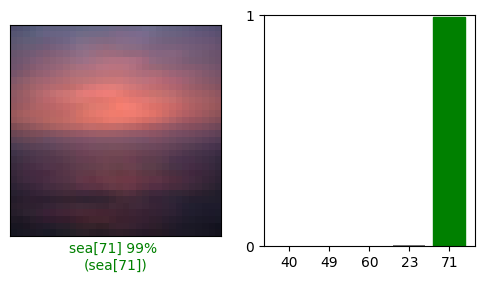

<Figure size 640x480 with 0 Axes>

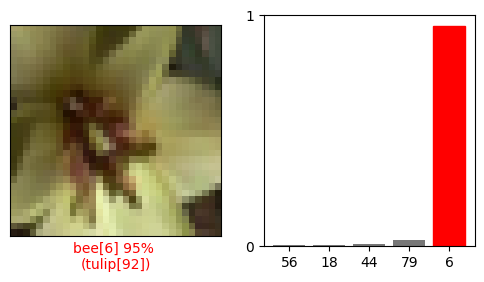

<Figure size 640x480 with 0 Axes>

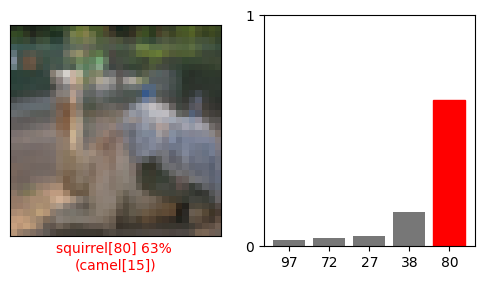

<Figure size 640x480 with 0 Axes>

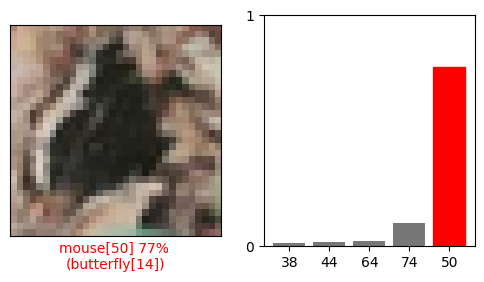

<Figure size 640x480 with 0 Axes>

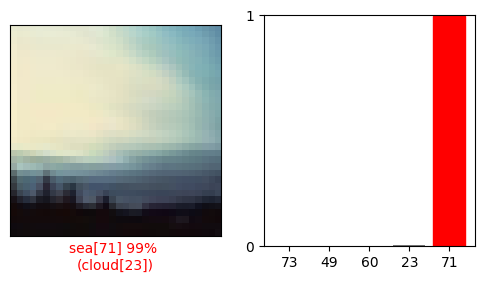

<Figure size 640x480 with 0 Axes>

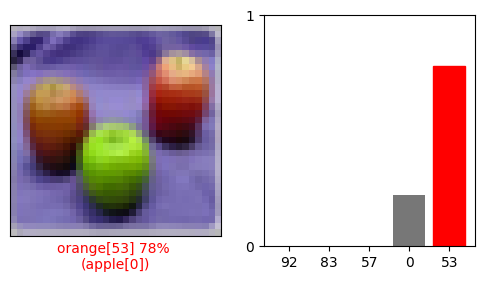

<Figure size 640x480 with 0 Axes>

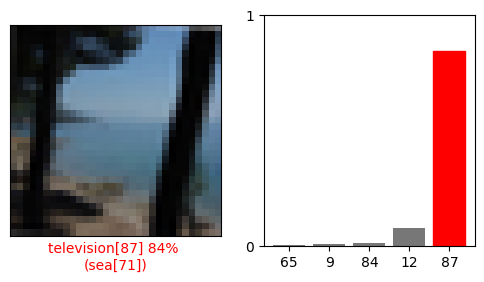

<Figure size 640x480 with 0 Axes>

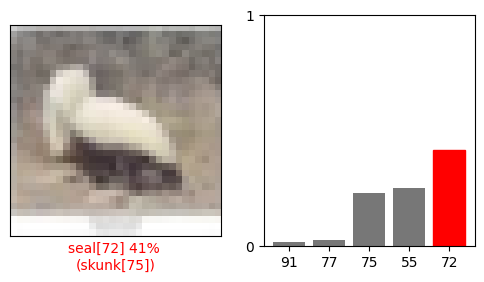

<Figure size 640x480 with 0 Axes>

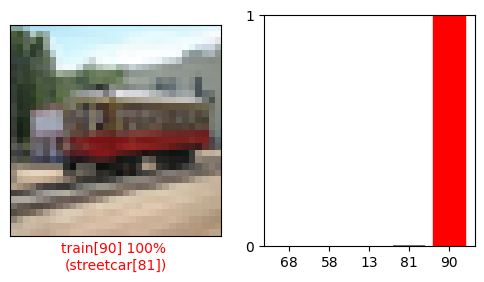

<Figure size 640x480 with 0 Axes>

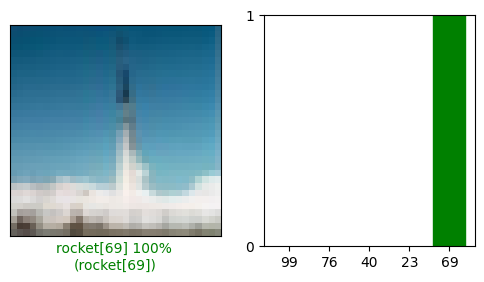

<Figure size 640x480 with 0 Axes>

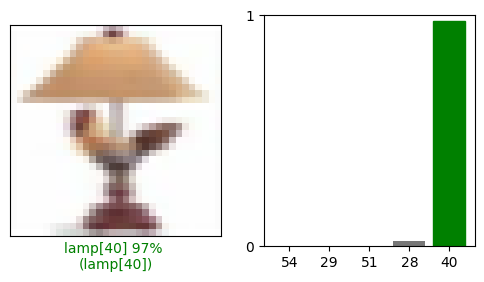

<Figure size 640x480 with 0 Axes>

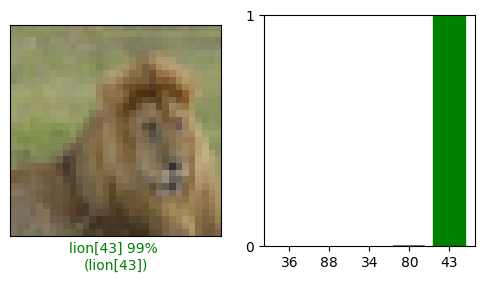

<Figure size 640x480 with 0 Axes>

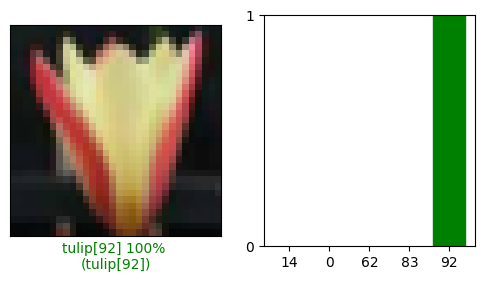

<Figure size 640x480 with 0 Axes>

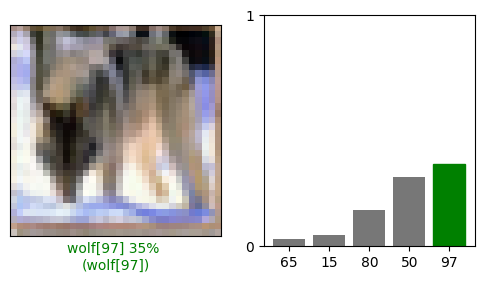

<Figure size 640x480 with 0 Axes>

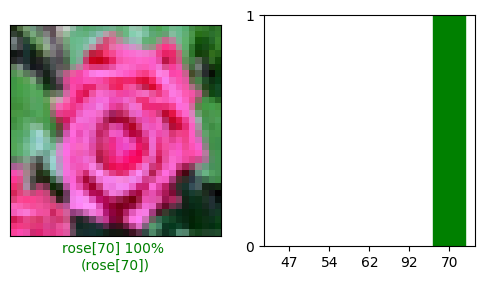

<Figure size 640x480 with 0 Axes>

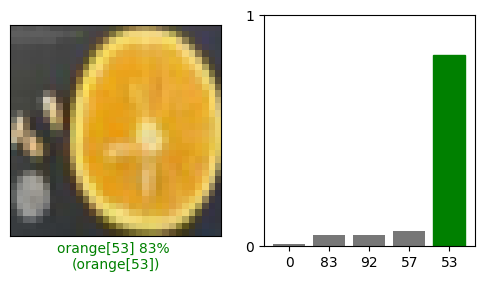

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(20):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_y.reshape(10000,), test_X.reshape(10000,32,32,3))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_y)
  plt.show()
  plt.clf()

Visualizamos de forma más general las predicciones hechas en 25 imagenes aleatorias en la siguiente gráfica:

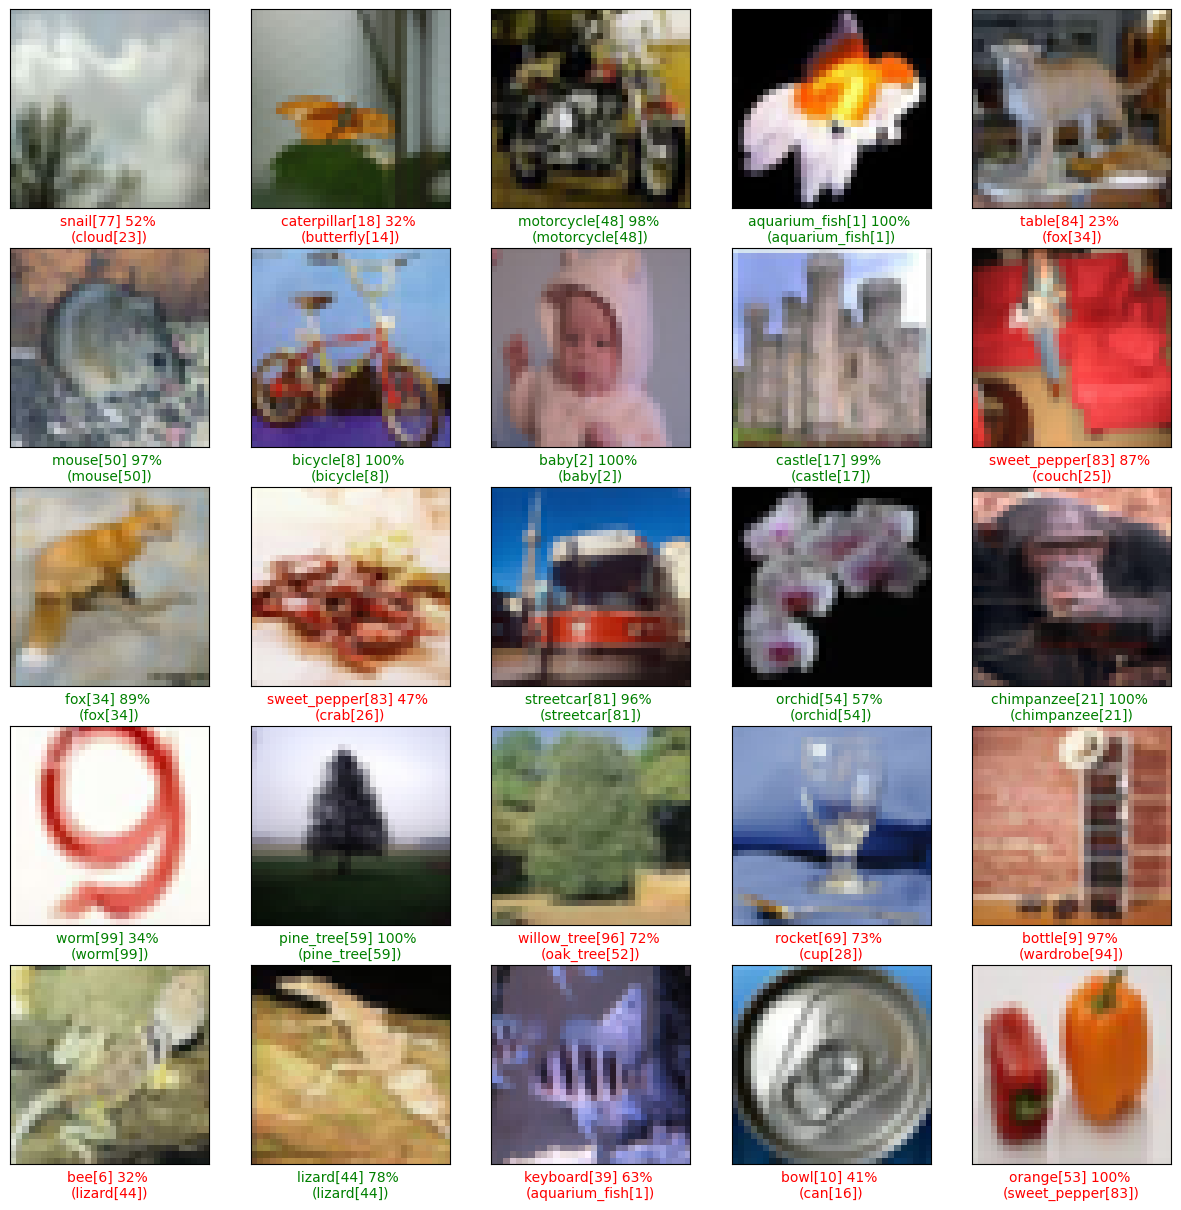

In [ ]:
import numpy as np

# Selecciona 25 índices aleatorios
indices = np.random.choice(len(predictions), 25, replace=False)

# Crea una figura de 5x5
plt.figure(figsize=(15,15))

for i in range(5):
    for j in range(5):
        # Calcula el índice en la lista de índices aleatorios
        index = i * 5 + j

        # Crea un subplot en la posición i, j
        plt.subplot(5, 5, index+1)

        # Llama a la función plot_image con el índice aleatorio
        plot_image(indices[index], predictions[indices[index]], test_y.reshape(10000,), test_X.reshape(10000,32,32,3))

# Muestra la figura
plt.show()

## Matriz de confusión

Calculamos la matriz de confusión. No se puede represnetar por completo, pero la vamos a representar de forma parcial tratando de extraer la máxima información posible.

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

# Predicción de valores desde el dataset de validación
Y_pred = model.predict(test_X)

# Convertir en predicciones de clases desde los vectores one-hot encoding
Y_pred_classes = np.argmax(Y_pred, axis = 1)

# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = test_y.reshape(10000,)

# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
print(confusion_mtx)

313/313 [==============================] - 2s 7ms/step
[[78  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 1  1 41 ...  0  8  0]
 ...
 [ 0  0  0 ... 42  3  1]
 [ 1  0  2 ...  0 38  1]
 [ 0  0  0 ...  0  0 60]]


Mostramos las 5 clases que peor número de predicciones correctas tienen y las 5 clases con más números de predicciones correctas en una submatriz de confusión.

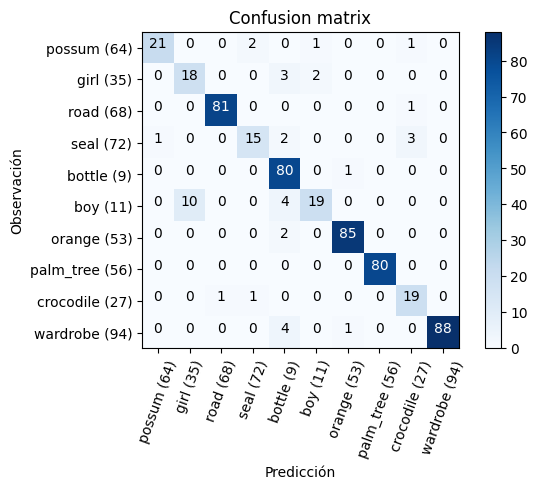

In [ ]:
# Calculas la precisión de cada clase
class_accuracy = np.diag(confusion_mtx) / confusion_mtx.sum(axis=1)

# Obtienes las 5 clases con mejores predicciones
top_5 = np.argsort(class_accuracy)[-5:]

# Obtienes las 5 clases con peores predicciones
bottom_5 = np.argsort(class_accuracy)[:5]

# Creas la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Unes los arrays y los conviertes en una lista
indices = np.concatenate((top_5, bottom_5)).tolist()
indices = list(set(indices)) # Set - elimina repetidos

# Creas una nueva matriz de confusión con solo las filas y columnas seleccionadas
small_confusion_mtx = confusion_mtx[indices][:, indices]

# Muestras la matriz de confusión
plot_confusion_matrix(small_confusion_mtx, classes = [f'{class_names[indx]} ({indx})' for indx in indices])

Ahora mostramos las 5 parejas de clases que más se han confundido en una submatriz de confusión.

Las 5 parejas más confundidas son [(4, 50), (61, 10), (35, 98), (70, 92), (62, 92)]


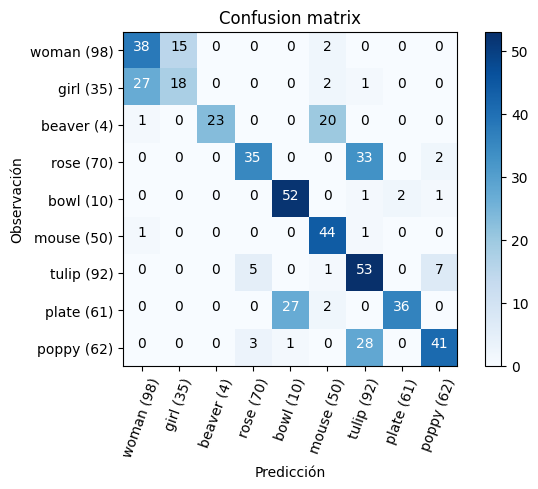

In [ ]:
import numpy as np

# Creas una copia de la matriz de confusión
confusion_mtx_copy = confusion_mtx.copy()

# Pones a cero la diagonal
np.fill_diagonal(confusion_mtx_copy, 0)

# Aplanas la matriz y obtienes los índices de los 5 valores más grandes
top_5_indices = np.argpartition(confusion_mtx_copy.flatten(), -5)[-5:]

# Conviertes los índices a coordenadas en 2D
top_5_pairs = np.unravel_index(top_5_indices, confusion_mtx_copy.shape)

print(f"Las 5 parejas más confundidas son {list(zip(top_5_pairs[0], top_5_pairs[1]))}")
# Conviertes la lista de top_5_pairs en una lista normal
lista_normal = np.array(top_5_pairs).flatten().tolist()

# Eliminas los elementos repetidos
lista_sin_repetidos = list(set(lista_normal))

# Creas la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Seleccionas las clases
indices = lista_sin_repetidos

# Creas una nueva matriz de confusión con solo las filas y columnas seleccionadas
small_confusion_mtx = confusion_mtx[indices][:, indices]

# Muestras la matriz de confusión
plot_confusion_matrix(small_confusion_mtx, classes = [f'{class_names[indx]} ({indx})' for indx in indices])